In the following notebook the data.txt file will be explored and the results will be plotted

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# read the text file into a DataFrame
df = pd.read_csv("PYLOShitdatacomplete.txt", delimiter='\t')

In [4]:
# extract each column as a list
neutrino_depth = df['Neutrino Depth [m]'].tolist()
neutrino_min_angle = df['Neutrino Min Angle [degrees]'].tolist()
neutrino_max_angle = df['Neutrino Max Angle [degrees]'].tolist()
hydrophone_depth = df['Hydrophone Depth [m]'].tolist()
hydrophone_distance = df['Hydrophone Distance [m]'].tolist()
time_of_arrival = df['Time of Arrival [s]'].tolist()
signal_amplitude = df['Signal Amplitude'].tolist()
angle_of_departure = df['Angle of Departure [degrees]'].tolist()
angle_of_arrival = df['Angle of Arrival [degrees]'].tolist()
surface_bounces = df['Surface Bounces'].tolist()
bottom_bounces = df['Bottom Bounces'].tolist()

# make a list with pancake angle
pancake_angle = [i - 5 for i in neutrino_max_angle]

# make the lists into an arrays
neutrino_depth_array = np.array(neutrino_depth)
neutrino_min_angle_array = np.array(neutrino_min_angle)
neutrino_max_angle_array = np.array(neutrino_max_angle)
hydrophone_depth_array = np.array(hydrophone_depth)
hydrophone_distance_array = np.array(hydrophone_distance)
time_of_arrival_array = np.array(time_of_arrival)
signal_amplitude_array = np.array(signal_amplitude)
angle_of_departure_array = np.array(angle_of_departure)
angle_of_arrival_array = np.array(angle_of_arrival)
surface_bounces_array = np.array(surface_bounces)
bottom_bounces_array = np.array(bottom_bounces)
pancake_angle_array = np.array(pancake_angle)

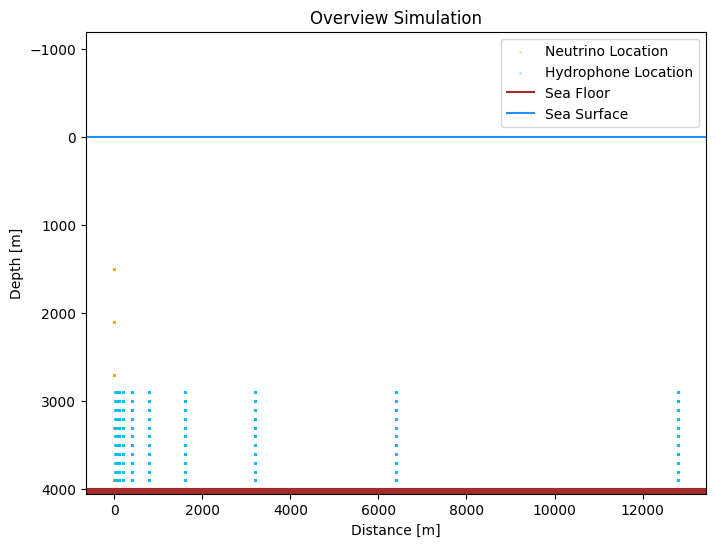

In [5]:
# plot the location of the neutrino sources and neutrino hits
plt.figure(figsize=(8,6))

neutrino_x = np.zeros(len(neutrino_depth_array))

# add the data points
plt.scatter(neutrino_x, neutrino_depth_array, color='orange', s=0.1, label='Neutrino Location')
plt.scatter(hydrophone_distance_array, hydrophone_depth_array, color='deepskyblue', s=0.1, label='Hydrophone Location')

# give names to axes
plt.title('Overview Simulation')
plt.xlabel('Distance [m]')
plt.ylabel('Depth [m]')

# add the sea floor and surface
plt.axhline(4000, color='brown', label='Sea Floor')
plt.axhline(4010, color='brown')
plt.axhline(4020, color='brown')
plt.axhline(4030, color='brown')
plt.axhline(4040, color='brown')
plt.axhline(4050, color='brown')

plt.axhline(0, color='dodgerblue', label='Sea Surface')

# add a y limit
plt.ylim(-1200, 4051)

# add a legend
plt.legend(loc='upper right')

plt.gca().invert_yaxis()

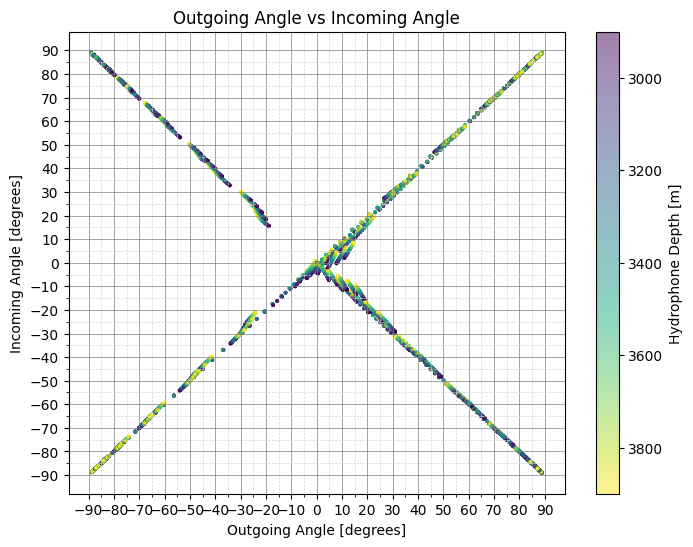

In [4]:
# plot the incoming angle vs. the outgoing angle
plt.figure(figsize=(8, 6))

# scatter plot with two dimensions
sc = plt.scatter(angle_of_departure, angle_of_arrival, c=hydrophone_depth, cmap='viridis', s=3, alpha=0.5)

# add labels and title
plt.xlabel('Outgoing Angle [degrees]')
plt.ylabel('Incoming Angle [degrees]')
plt.title('Outgoing Angle vs Incoming Angle')

# Set major and minor ticks
major_tick_interval = 10
minor_tick_interval = 5
plt.xticks(range(-90, 91, major_tick_interval))
plt.yticks(range(-90, 91, major_tick_interval))
plt.minorticks_on()
plt.xticks(range(-90, 91, minor_tick_interval), minor=True)
plt.yticks(range(-90, 91, minor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='lightgray')

# add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Hydrophone Depth [m]')
cbar.ax.invert_yaxis()

# show plot
plt.show()

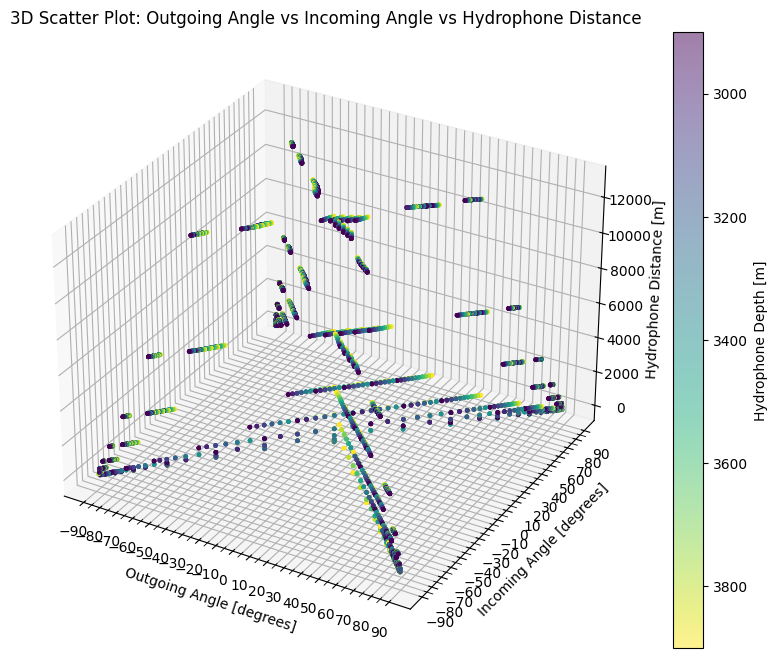

In [5]:
# create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot with three dimensions
sc = ax.scatter(angle_of_departure, angle_of_arrival, hydrophone_distance, c=hydrophone_depth, cmap='viridis', s=5, alpha=0.5)

# add labels and title
ax.set_xlabel('Outgoing Angle [degrees]')
ax.set_ylabel('Incoming Angle [degrees]')
ax.set_zlabel('Hydrophone Distance [m]')
ax.set_title('3D Scatter Plot: Outgoing Angle vs Incoming Angle vs Hydrophone Distance')

# set major and minor ticks
major_tick_interval = 10
minor_tick_interval = 5
plt.xticks(range(-90, 91, major_tick_interval))
plt.yticks(range(-90, 91, major_tick_interval))
plt.minorticks_on()
plt.xticks(range(-90, 91, minor_tick_interval), minor=True)
plt.yticks(range(-90, 91, minor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='--', linewidth='0.5', color='lightgray')

# add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Hydrophone Depth [m]')
cbar.ax.invert_yaxis()

# show plot
plt.show()

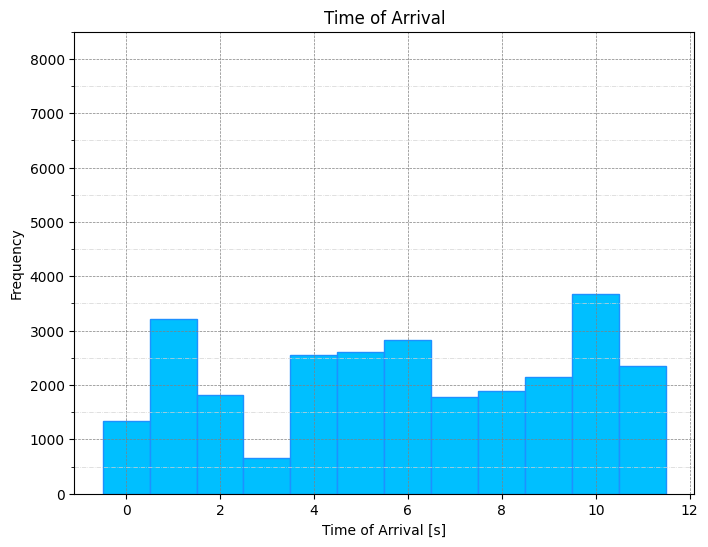

[ 0.25672555  0.25672474  0.19274911 ... 12.0502939  12.113205
 12.113205  ]


In [6]:
# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(8, 6))

# determine the width of the bins
bin_width = 1

# calculate the half-width to center the bars
half_width = bin_width / 2

# calculate the bin edges
bin_edges = [x - half_width for x in range(0, 13, 1)]

# plot the histogram
plt.hist(time_of_arrival_array, bins=bin_edges, color='deepskyblue', edgecolor='dodgerblue', width=bin_width)

# set major and minor ticks
ymajor_tick_interval = 1000
yminor_tick_interval = 500

plt.yticks(range(0, 9000, ymajor_tick_interval))
plt.yticks(range(0, 9000, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# add labels and title
plt.xlabel('Time of Arrival [s]')
plt.ylabel('Frequency')
plt.title('Time of Arrival')

# Show plot
plt.show()

print(time_of_arrival_array)

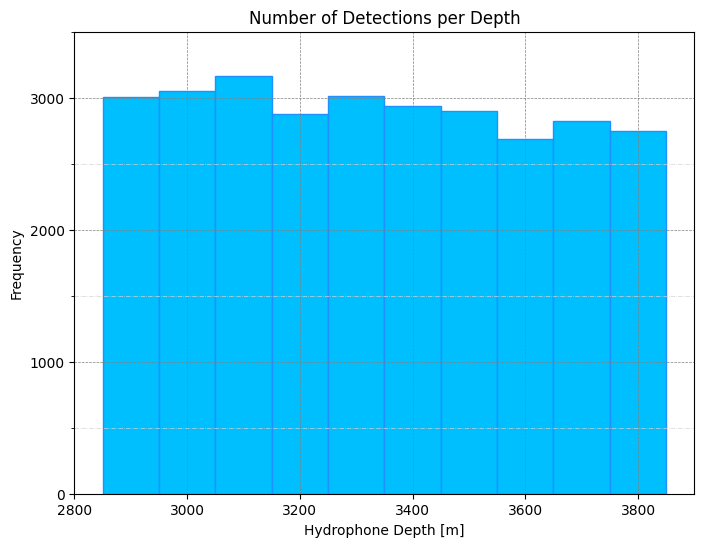

In [8]:
# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(8, 6))

# determine the width of the bins
bin_width = 100

# calculate the half-width to center the bars
half_width = bin_width / 2

# calculate the bin edges
bin_edges = [x - half_width for x in range(2900, 3901, 100)]

# plot the histogram
plt.hist(hydrophone_depth, bins=bin_edges, color='deepskyblue', edgecolor='dodgerblue', width=bin_width)

# set major and minor ticks
ymajor_tick_interval = 1000
yminor_tick_interval = 500

plt.yticks(range(0, 4000, ymajor_tick_interval))
plt.yticks(range(0, 4000, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

plt.xscale("linear")
# add labels and title
plt.xlabel('Hydrophone Depth [m]')
plt.ylabel('Frequency')
plt.title('Number of Detections per Depth')
#plt.ylim(3900, 4100)

# Show plot
plt.show()

[2850.0, 2950.0, 3050.0, 3150.0, 3250.0, 3350.0, 3450.0, 3550.0, 3650.0, 3750.0, 3850.0]
100


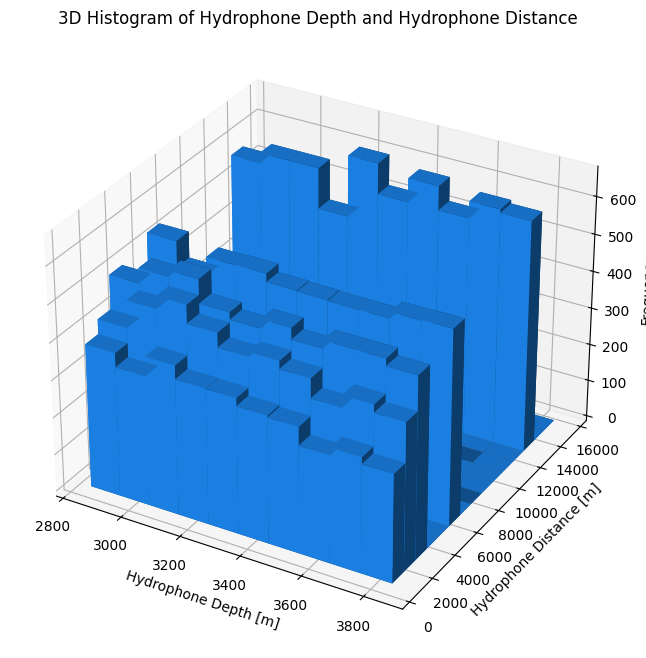

In [9]:
example = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]


# Create a 3D histogram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# determine the width of the bins
bin_width_distance = 1000

# calculate the half-width to center the bars
half_width_distance = bin_width_distance / 2

# calculate the bin edges
bin_edges_distance = [x - half_width_distance for x in range(1000, 16001, 1000)]

print(bin_edges)
# create a 3D histogram using histogram2d
hist, xedges, yedges = np.histogram2d(hydrophone_depth, hydrophone_distance, bins=(bin_edges, bin_edges_distance))

# construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# construct arrays with the dimensions for the 16 bars.
dx = 100 * np.ones_like(zpos)
dy = 1000 * np.ones_like(zpos)
print(dx)
dz = hist.ravel()

# plot 3D bars with square dimensions
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='dodgerblue')

# add labels and title
ax.set_xlabel('Hydrophone Depth [m]')
ax.set_ylabel('Hydrophone Distance [m]')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram of Hydrophone Depth and Hydrophone Distance')

# Show plot
plt.show()

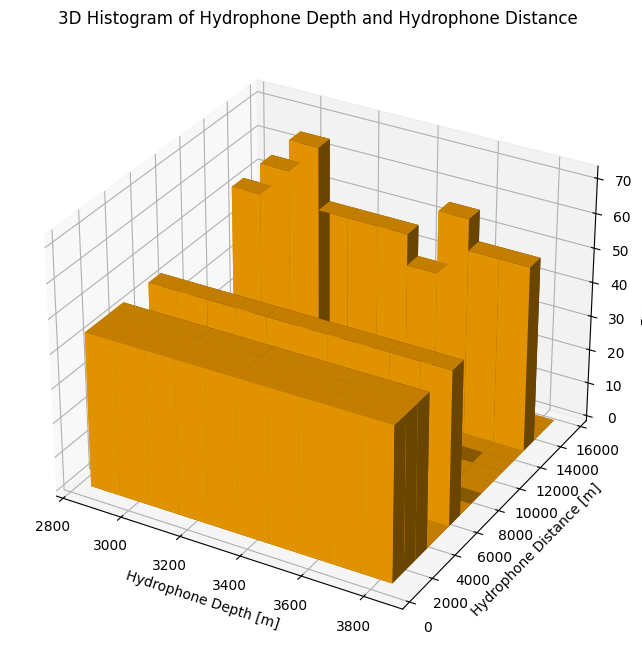

In [10]:
hydrophone_depth_clean = hydrophone_depth_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
hydrophone_distance_clean = hydrophone_distance_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]

# Create a 3D histogram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# determine the width of the bins
bin_width_distance = 1000

# calculate the half-width to center the bars
half_width_distance = bin_width_distance / 2

# calculate the bin edges
bin_edges_distance = [x - half_width_distance for x in range(1000, 16001, 1000)]

# create a 3D histogram using histogram2d
hist, xedges, yedges = np.histogram2d(hydrophone_depth_clean, hydrophone_distance_clean, bins=(bin_edges, bin_edges_distance))

# construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# construct arrays with the dimensions for the 16 bars.
dx = 100 * np.ones_like(zpos)
dy = 1000 * np.ones_like(zpos)
dz = hist.ravel()

# plot 3D bars with square dimensions
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='orange')

# add labels and title
ax.set_xlabel('Hydrophone Depth [m]')
ax.set_ylabel('Hydrophone Distance [m]')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram of Hydrophone Depth and Hydrophone Distance')

# Show plot
plt.show()

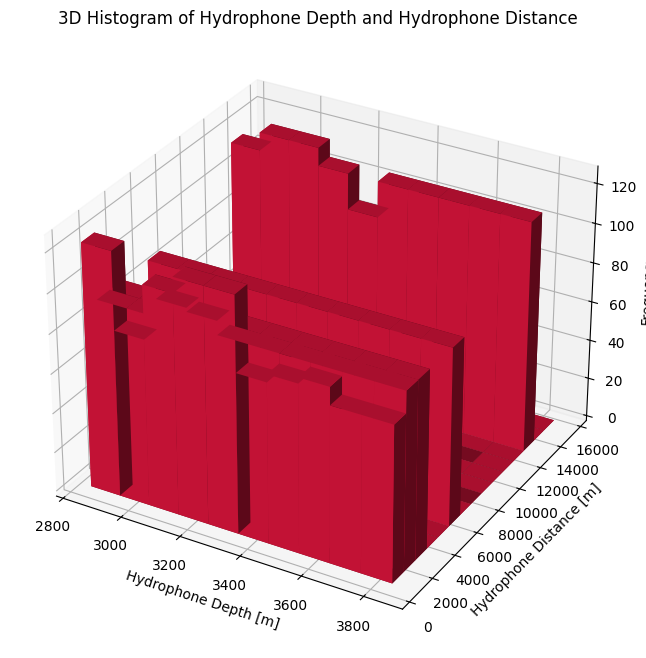

In [11]:
hydrophone_depth_no_bottom = hydrophone_depth_array[(bottom_bounces_array == 0)]
hydrophone_distance_no_bottom = hydrophone_distance_array[(bottom_bounces_array == 0)]

# Create a 3D histogram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# determine the width of the bins
bin_width_distance = 1000

# calculate the half-width to center the bars
half_width_distance = bin_width_distance / 2

# calculate the bin edges
bin_edges_distance = [x - half_width_distance for x in range(1000, 16001, 1000)]

# create a 3D histogram using histogram2d
hist, xedges, yedges = np.histogram2d(hydrophone_depth_no_bottom, hydrophone_distance_no_bottom, bins=(bin_edges, bin_edges_distance))

# construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# construct arrays with the dimensions for the 16 bars.
dx = 100 * np.ones_like(zpos)
dy = 1000 * np.ones_like(zpos)
dz = hist.ravel()

# plot 3D bars with square dimensions
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='crimson')

# add labels and title
ax.set_xlabel('Hydrophone Depth [m]')
ax.set_ylabel('Hydrophone Distance [m]')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram of Hydrophone Depth and Hydrophone Distance')

# Show plot
plt.show()

100


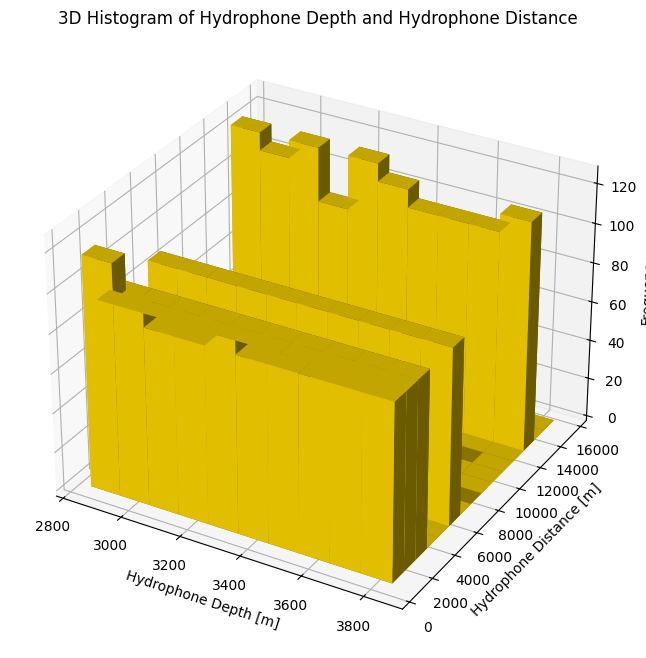

In [12]:
hydrophone_depth_no_surface = hydrophone_depth_array[(surface_bounces_array == 0)]
hydrophone_distance_no_surface = hydrophone_distance_array[(surface_bounces_array == 0)]

# Create a 3D histogram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# determine the width of the bins
bin_width_distance = 1000

# calculate the half-width to center the bars
half_width_distance = bin_width_distance / 2

# calculate the bin edges
bin_edges_distance = [x - half_width_distance for x in range(1000, 16001, 1000)]

# create a 3D histogram using histogram2d
hist, xedges, yedges = np.histogram2d(hydrophone_depth_no_surface, hydrophone_distance_no_surface, bins=(bin_edges, bin_edges_distance))

# construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# construct arrays with the dimensions for the 16 bars.
dx = 100 * np.ones_like(zpos)
dy = 1000 * np.ones_like(zpos)
print(dx)
dz = hist.ravel()

# plot 3D bars with square dimensions
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='gold')

# add labels and title
ax.set_xlabel('Hydrophone Depth [m]')
ax.set_ylabel('Hydrophone Distance [m]')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram of Hydrophone Depth and Hydrophone Distance')

# Show plot
plt.show()

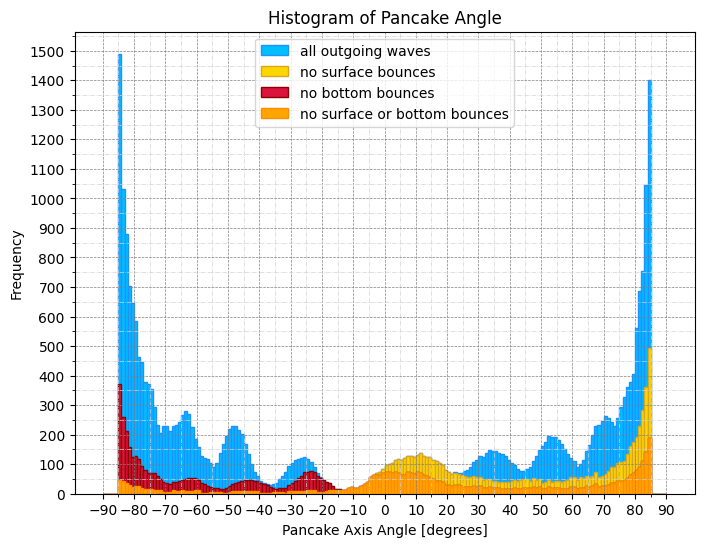

In [13]:
pancake_angle_clean = pancake_angle_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
pancake_angle_no_surface = pancake_angle_array[(surface_bounces_array == 0)]
pancake_angle_no_bottom = pancake_angle_array[(bottom_bounces_array == 0)]

# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(8, 6))
plt.hist(pancake_angle, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
plt.hist(pancake_angle_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
plt.hist(pancake_angle_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
plt.hist(pancake_angle_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label='no surface or bottom bounces')

# add labels and title
plt.xlabel('Pancake Axis Angle [degrees]')
plt.ylabel('Frequency')
plt.title('Histogram of Pancake Angle')

# set major and minor ticks
xmajor_tick_interval = 10
xminor_tick_interval = 5
ymajor_tick_interval = 100
yminor_tick_interval = 50

plt.xticks(range(-90, 91, xmajor_tick_interval))
plt.yticks(range(0, 1600, ymajor_tick_interval))
plt.xticks(range(-90, 91, xminor_tick_interval), minor=True)
plt.yticks(range(0, 1600, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# plot legend
plt.legend()

# show plot
plt.show()

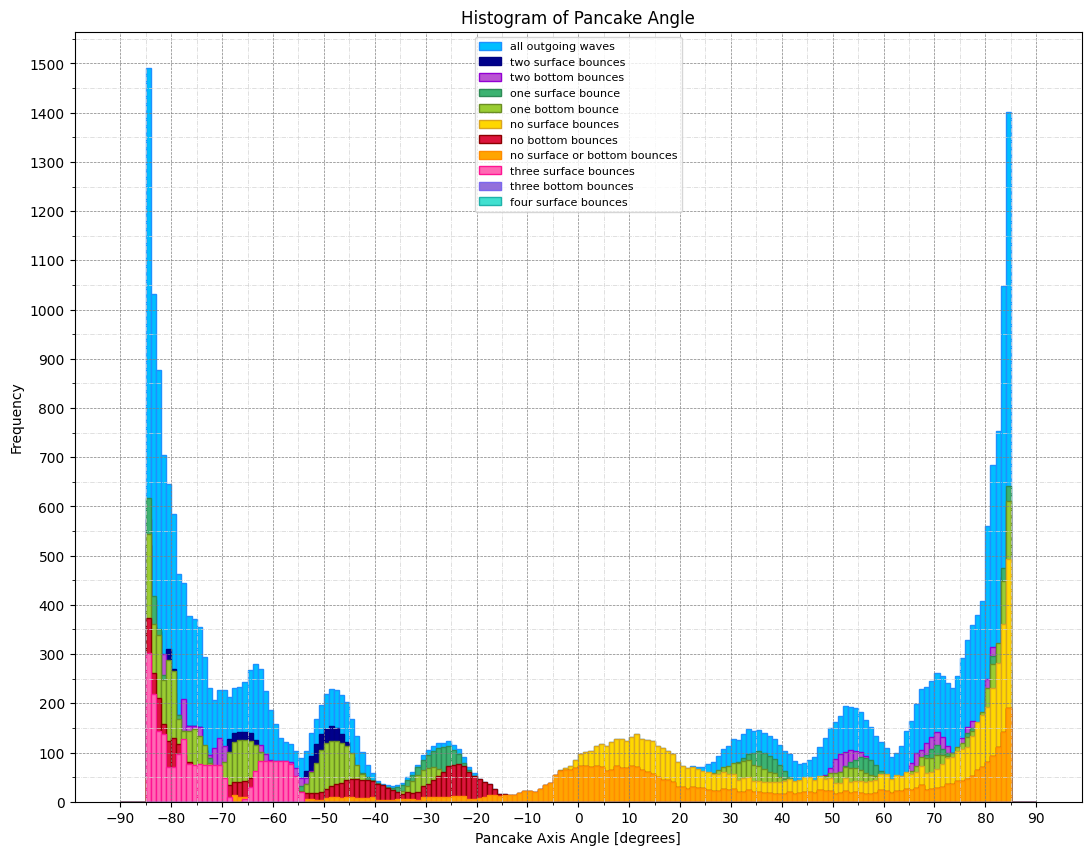

In [14]:
pancake_angle_clean = pancake_angle_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
pancake_angle_no_surface = pancake_angle_array[(surface_bounces_array == 0)]
pancake_angle_no_bottom = pancake_angle_array[(bottom_bounces_array == 0)]
pancake_angle_1_surface = pancake_angle_array[(surface_bounces_array == 1)]
pancake_angle_1_bottom = pancake_angle_array[(bottom_bounces_array == 1)]
pancake_angle_2_surface = pancake_angle_array[(surface_bounces_array == 2)]
pancake_angle_2_bottom = pancake_angle_array[(bottom_bounces_array == 2)]
pancake_angle_3_surface = pancake_angle_array[(surface_bounces_array == 3)]
pancake_angle_3_bottom = pancake_angle_array[(bottom_bounces_array == 3)]
pancake_angle_4_surface = pancake_angle_array[(surface_bounces_array == 4)]

# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(13, 10))
plt.hist(pancake_angle, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
plt.hist(pancake_angle_2_surface, bins=range(-90, 91), color='darkblue', edgecolor='navy', label='two surface bounces')
plt.hist(pancake_angle_2_bottom, bins=range(-90, 91), color='mediumorchid', edgecolor='darkviolet', label='two bottom bounces')
plt.hist(pancake_angle_1_surface, bins=range(-90, 91), color='mediumseagreen', edgecolor='seagreen', label='one surface bounce')
plt.hist(pancake_angle_1_bottom, bins=range(-90, 91), color='yellowgreen', edgecolor='olivedrab', label='one bottom bounce')
plt.hist(pancake_angle_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
plt.hist(pancake_angle_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
plt.hist(pancake_angle_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label='no surface or bottom bounces')
plt.hist(pancake_angle_3_surface, bins=range(-90, 91), color='hotpink', edgecolor='deeppink', label='three surface bounces')
plt.hist(pancake_angle_3_bottom, bins=range(-90, 91), color='mediumpurple', edgecolor='mediumslateblue', label='three bottom bounces')
plt.hist(pancake_angle_4_surface, bins=range(-90, 91), color='turquoise', edgecolor='lightseagreen', label='four surface bounces')

# add labels and title
plt.xlabel('Pancake Axis Angle [degrees]')
plt.ylabel('Frequency')
plt.title('Histogram of Pancake Angle')

# set major and minor ticks
xmajor_tick_interval = 10
xminor_tick_interval = 5
ymajor_tick_interval = 100
yminor_tick_interval = 50

plt.xticks(range(-90, 91, xmajor_tick_interval))
plt.yticks(range(0, 1600, ymajor_tick_interval))
plt.xticks(range(-90, 91, xminor_tick_interval), minor=True)
plt.yticks(range(0, 1600, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# plot legend
plt.legend(fontsize=8)

# show plot
plt.show()

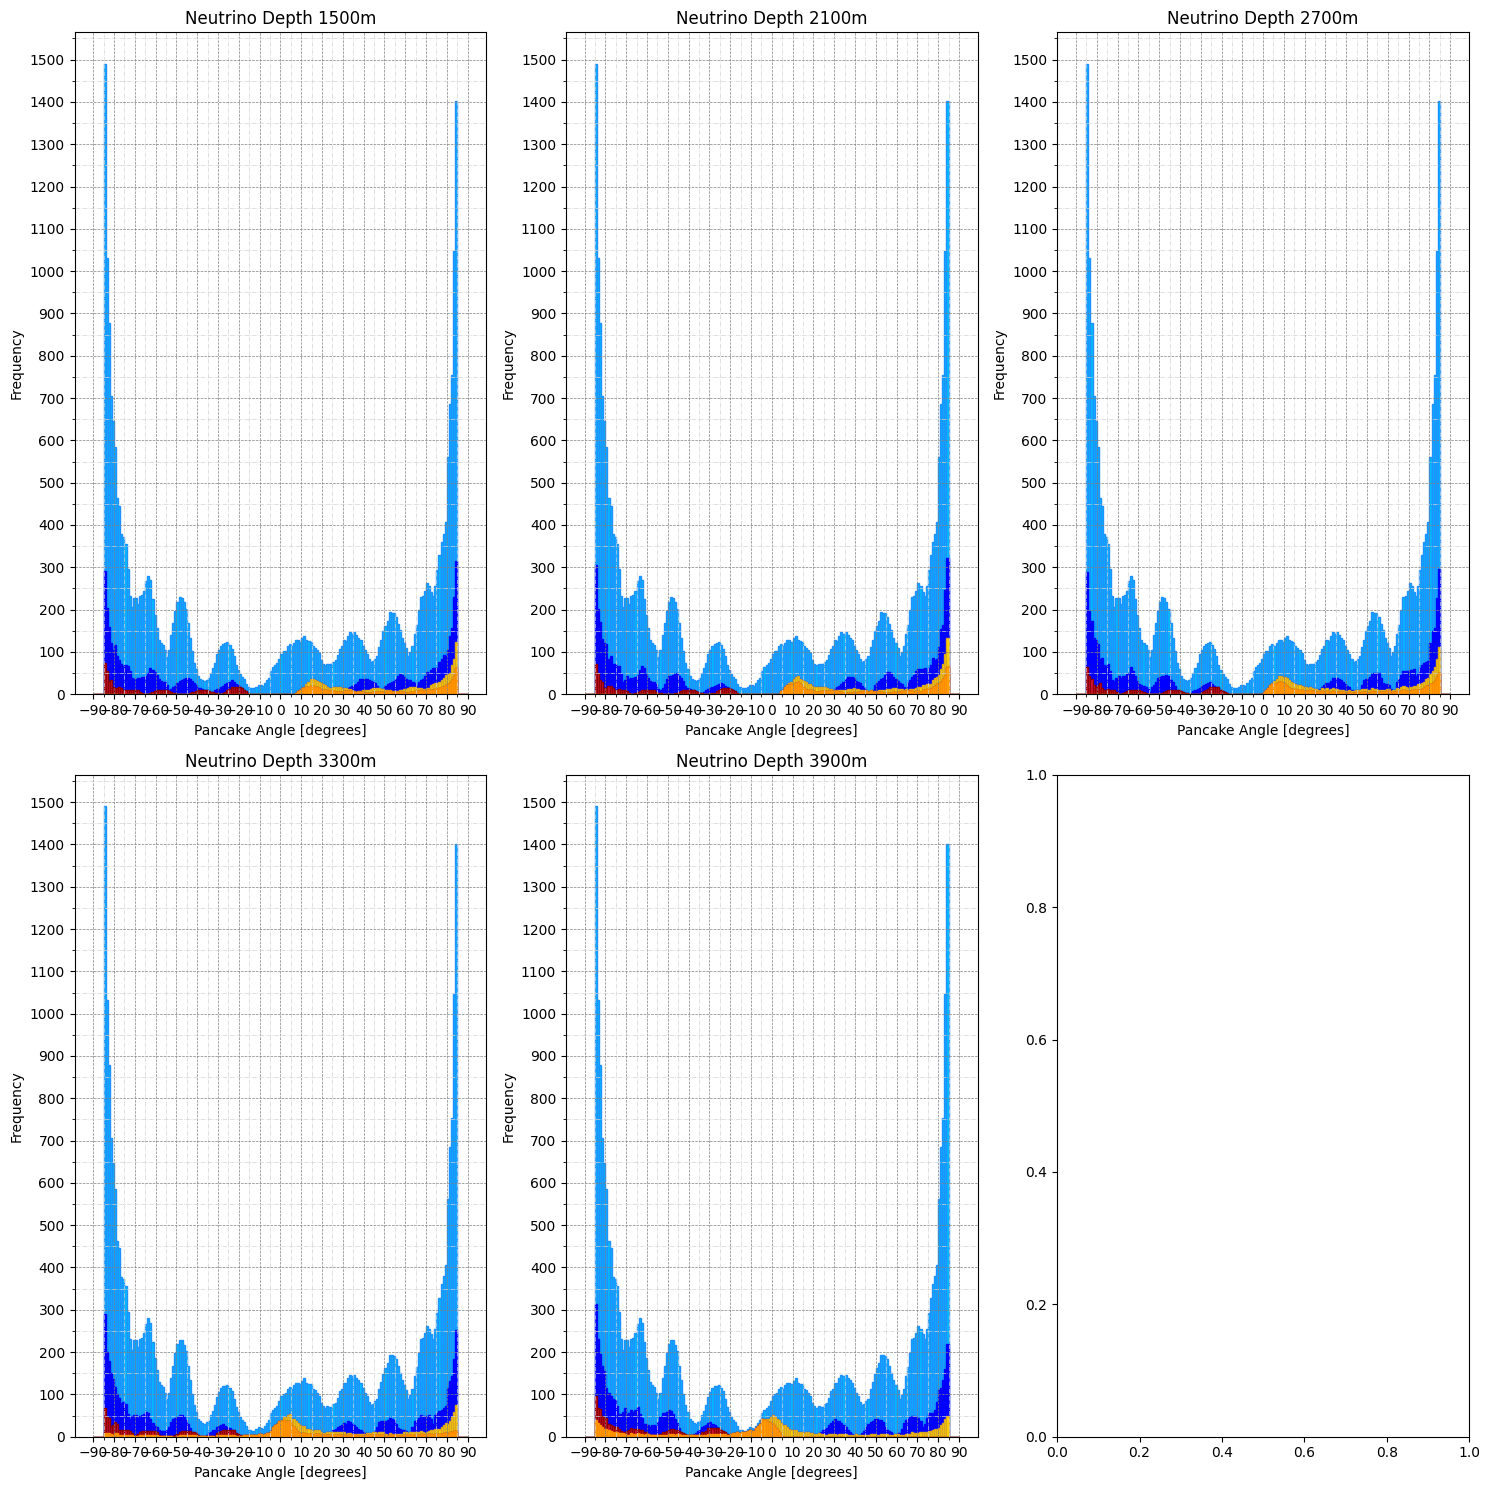

In [16]:
# define the neutrino depths
depths = [1500, 2100, 2700, 3300, 3900]                                 

# create a 3x4 panelled plot
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

# iterate over each depth and corresponding subplot
for idx, depth in enumerate(depths):
    # filter out pancake angles for the current depth
    pancake_angles = pancake_angle_array[neutrino_depth_array == depth]
    pancake_angles_clean = pancake_angle_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (neutrino_depth_array == depth)]
    pancake_angle_no_surface = pancake_angle_array[(surface_bounces_array == 0) & (neutrino_depth_array == depth)]
    pancake_angle_no_bottom = pancake_angle_array[(bottom_bounces_array == 0) & (neutrino_depth_array == depth)]
    
    # calculate the row and column index for the subplot
    row_idx = idx // 3
    col_idx = idx % 3
    
    # plot histogram of incoming angle with a binsize of 1 degree
    axes[row_idx, col_idx].hist(pancake_angle, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    axes[row_idx, col_idx].hist(pancake_angles, bins=range(-90, 91), color='blue', edgecolor='blue', label=f'Depth {depth}m')
    axes[row_idx, col_idx].hist(pancake_angle_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
    axes[row_idx, col_idx].hist(pancake_angle_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(pancake_angles_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label=f'Depth {depth}m')

    # add labels and title
    axes[row_idx, col_idx].set_xlabel('Pancake Angle [degrees]')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Neutrino Depth {depth}m')
    
    # set major and minor ticks
    xmajor_tick_interval = 10
    xminor_tick_interval = 5
    ymajor_tick_interval = 100
    yminor_tick_interval = 50
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 1600, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 1600, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')
    
# adjust layout
plt.tight_layout()

# show plot
plt.show()

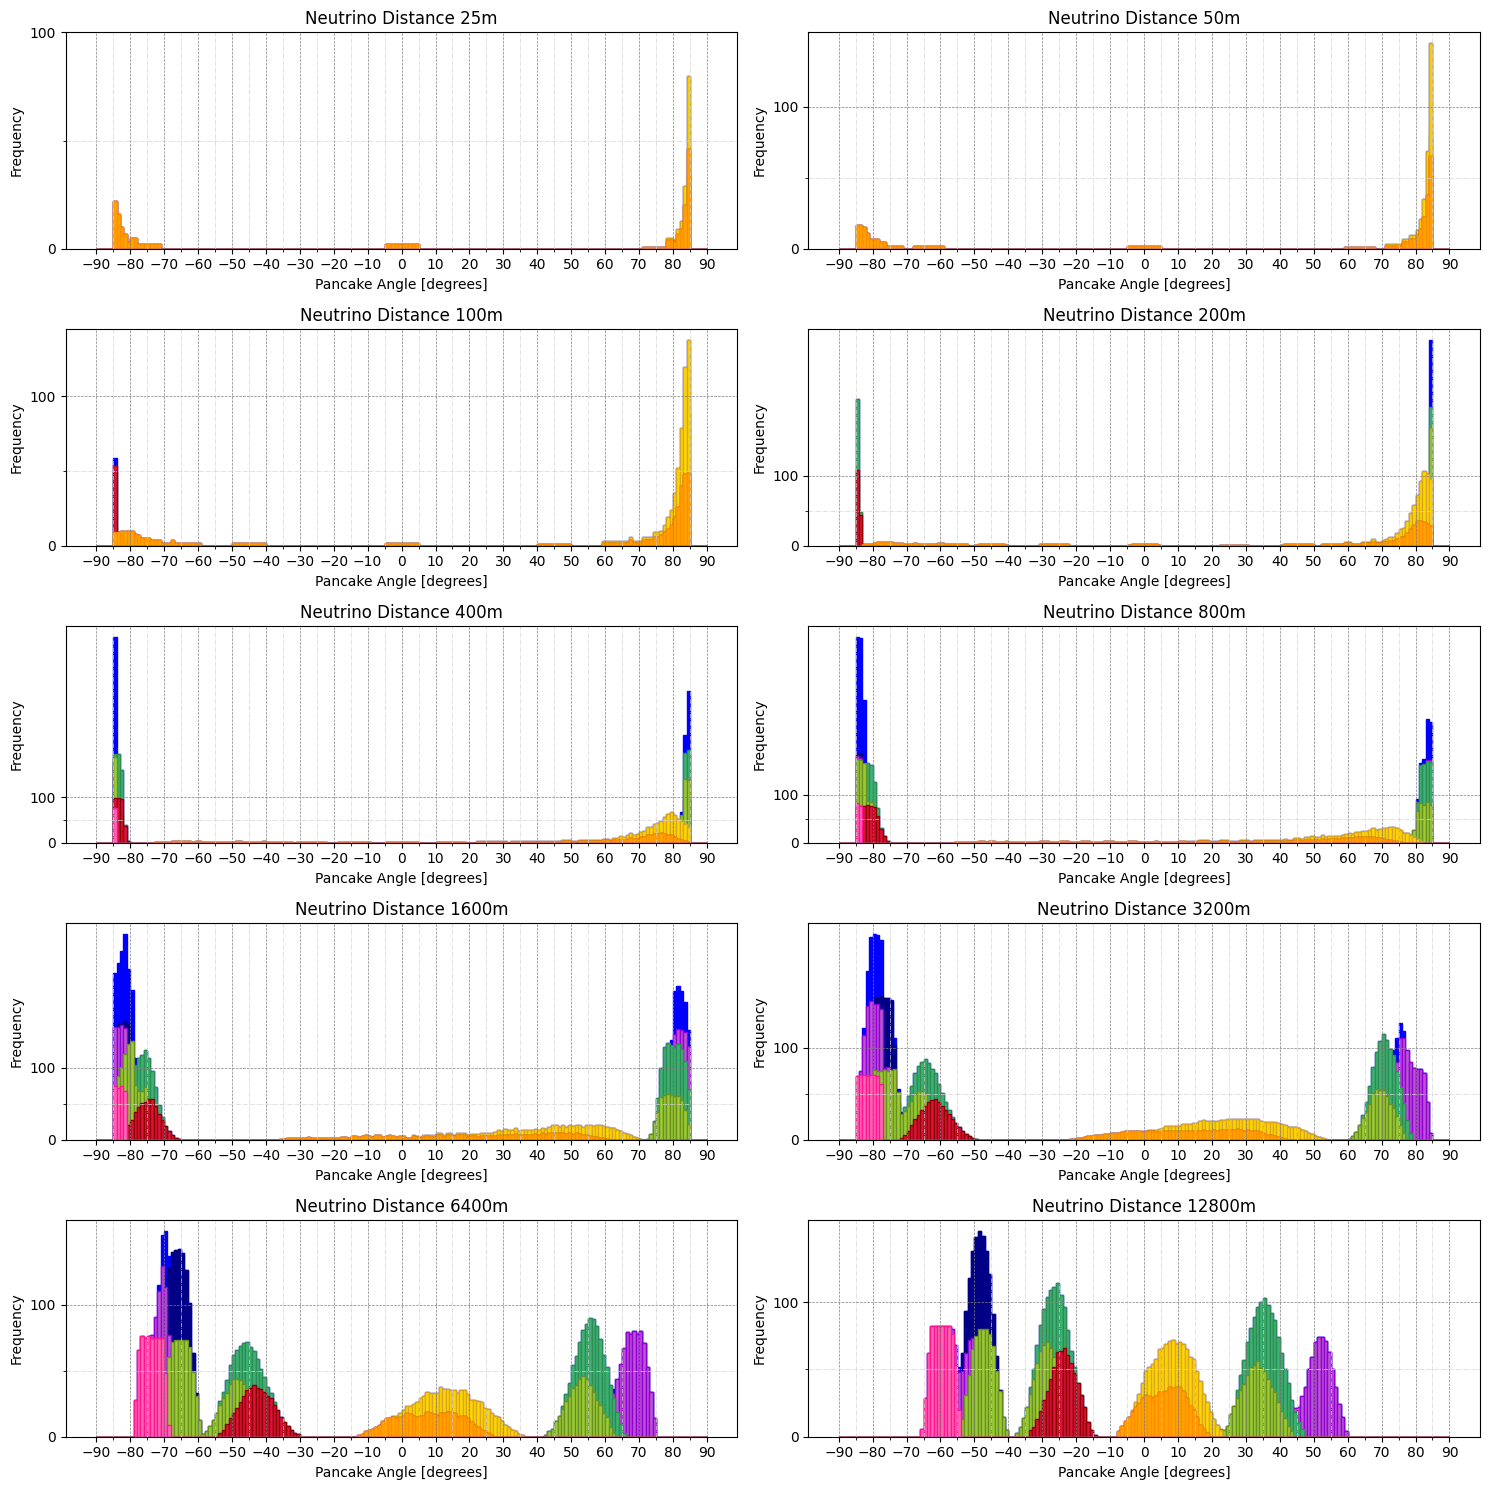

In [17]:
# define the neutrino depths
distances = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]

# create a 3x4 panelled plot
fig, axes = plt.subplots(5, 2, figsize=(15, 15))

# iterate over each depth and corresponding subplot
for idx, distance in enumerate(distances):
    # filter out pancake angles for the current depth
    pancake_angles = pancake_angle_array[hydrophone_distance_array == distance]
    pancake_angle_clean = pancake_angle_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array == distance)]
    pancake_angle_no_surface = pancake_angle_array[(surface_bounces_array == 0) & (hydrophone_distance_array == distance)]
    pancake_angle_no_bottom = pancake_angle_array[(bottom_bounces_array == 0) & (hydrophone_distance_array == distance)]
    pancake_angle_1_surface = pancake_angle_array[(surface_bounces_array == 1) & (hydrophone_distance_array == distance)]
    pancake_angle_1_bottom = pancake_angle_array[(bottom_bounces_array == 1) & (hydrophone_distance_array == distance)]
    pancake_angle_2_surface = pancake_angle_array[(surface_bounces_array == 2) & (hydrophone_distance_array == distance)]
    pancake_angle_2_bottom = pancake_angle_array[(bottom_bounces_array == 2) & (hydrophone_distance_array == distance)]
    pancake_angle_3_surface = pancake_angle_array[(surface_bounces_array == 3) & (hydrophone_distance_array == distance)]
    pancake_angle_3_bottom = pancake_angle_array[(bottom_bounces_array == 3) & (hydrophone_distance_array == distance)]
    
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2
    
    # plot histogram of incoming angle with a binsize of 1 degree
    # axes[row_idx, col_idx].hist(pancake_angle, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    axes[row_idx, col_idx].hist(pancake_angles, bins=range(-90, 91), color='blue', edgecolor='blue', label=f'Depth {depth}m')
    axes[row_idx, col_idx].hist(pancake_angle_2_surface, bins=range(-90, 91), color='darkblue', edgecolor='navy', label='two surface bounces')
    axes[row_idx, col_idx].hist(pancake_angle_2_bottom, bins=range(-90, 91), color='mediumorchid', edgecolor='darkviolet', label='two bottom bounces')
    axes[row_idx, col_idx].hist(pancake_angle_1_surface, bins=range(-90, 91), color='mediumseagreen', edgecolor='seagreen', label='one surface bounce')
    axes[row_idx, col_idx].hist(pancake_angle_1_bottom, bins=range(-90, 91), color='yellowgreen', edgecolor='olivedrab', label='one bottom bounce')
    axes[row_idx, col_idx].hist(pancake_angle_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
    axes[row_idx, col_idx].hist(pancake_angle_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(pancake_angle_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label='no surface or bottom bounces')
    axes[row_idx, col_idx].hist(pancake_angle_3_surface, bins=range(-90, 91), color='hotpink', edgecolor='deeppink', label='three surface bounces')
    axes[row_idx, col_idx].hist(pancake_angle_3_bottom, bins=range(-90, 91), color='mediumpurple', edgecolor='mediumslateblue', label='three bottom bounces')
    
    # add labels and title
    axes[row_idx, col_idx].set_xlabel('Pancake Angle [degrees]')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Neutrino Distance {distance}m')
    
    # set major and minor ticks
    xmajor_tick_interval = 10
    xminor_tick_interval = 5
    ymajor_tick_interval = 100
    yminor_tick_interval = 50
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 150, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 150, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')
    
# adjust layout
plt.tight_layout()

# show plot
plt.show()   

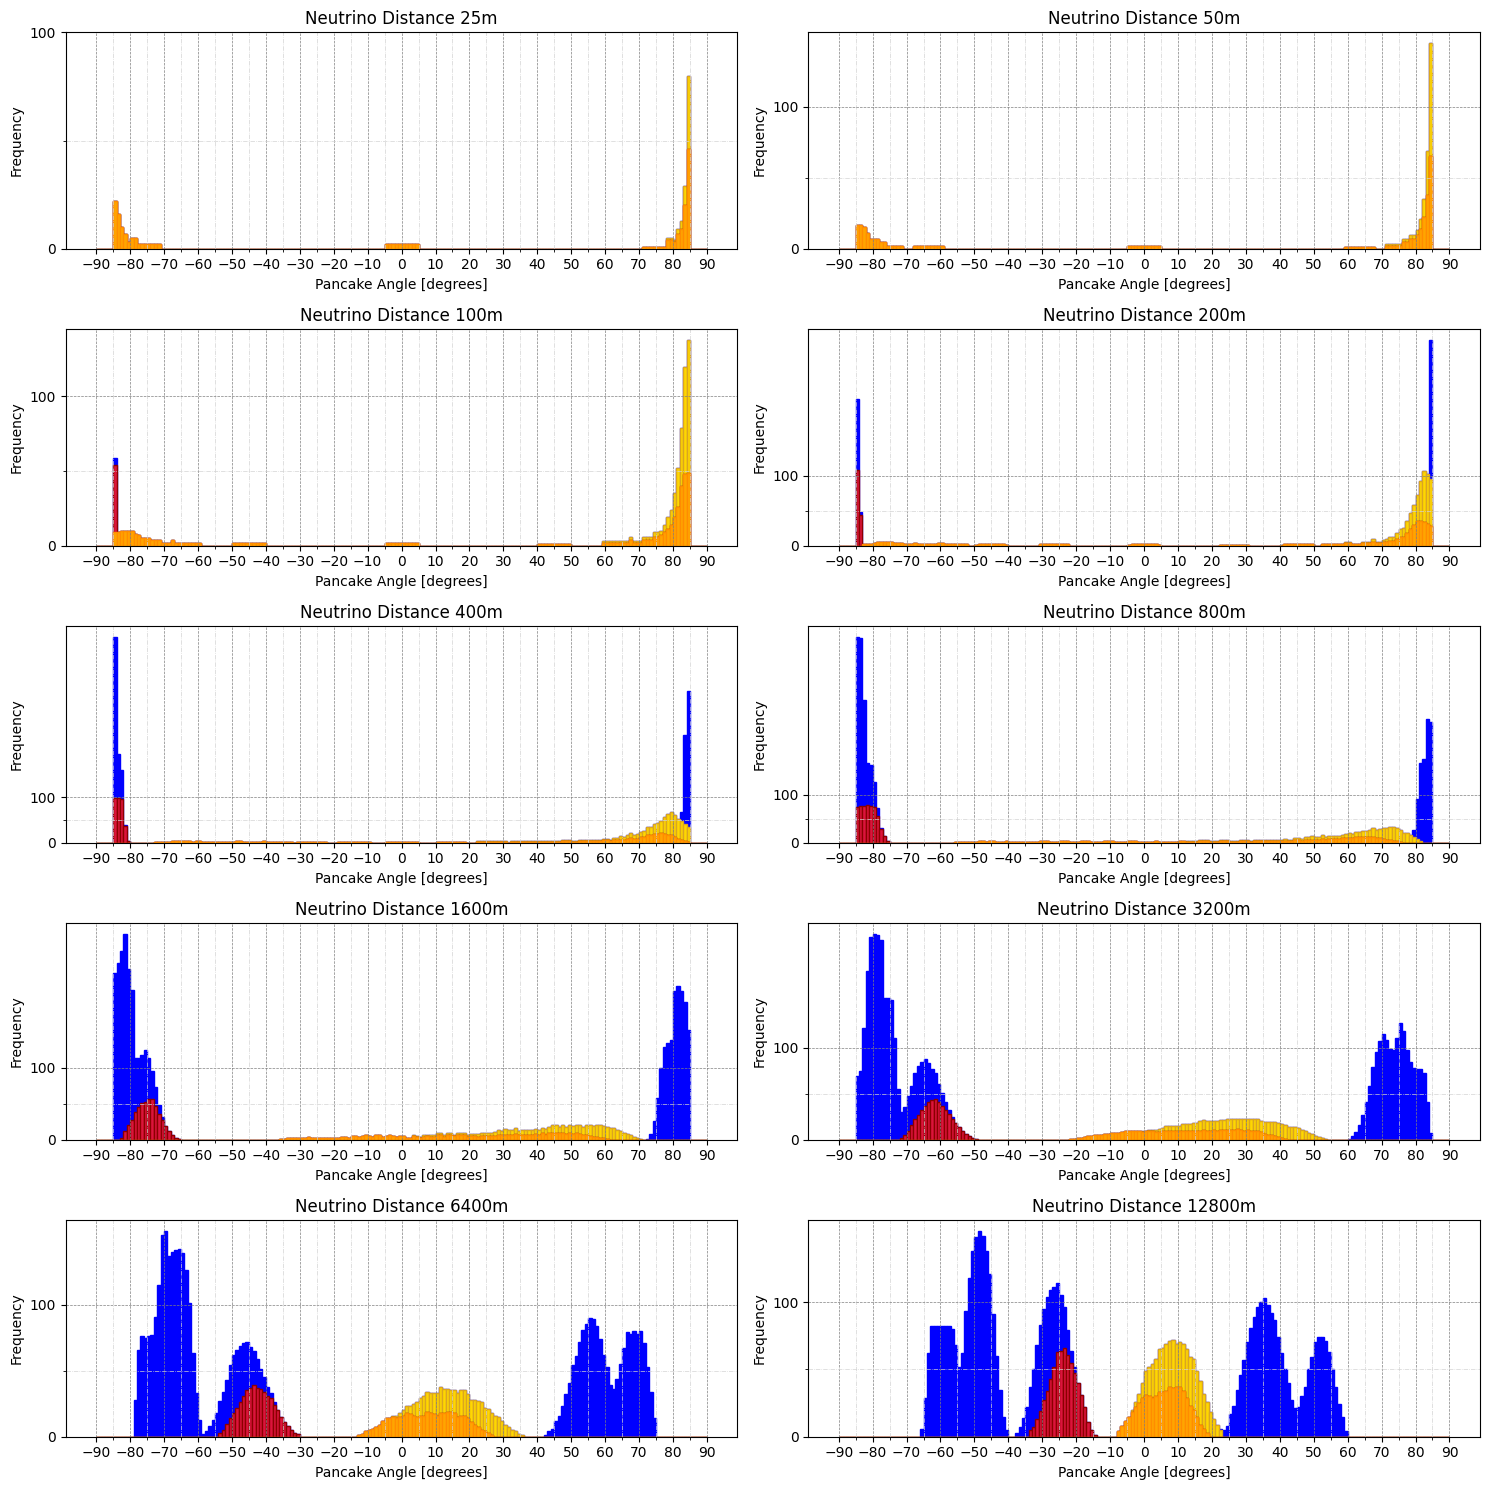

In [18]:
# define the neutrino depths
distances = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]

# create a 3x4 panelled plot
fig, axes = plt.subplots(5, 2, figsize=(15, 15))

# iterate over each depth and corresponding subplot
for idx, distance in enumerate(distances):
    # filter out pancake angles for the current depth
    pancake_angles = pancake_angle_array[hydrophone_distance_array == distance]
    pancake_angle_clean = pancake_angle_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array == distance)]
    pancake_angle_no_surface = pancake_angle_array[(surface_bounces_array == 0) & (hydrophone_distance_array == distance)]
    pancake_angle_no_bottom = pancake_angle_array[(bottom_bounces_array == 0) & (hydrophone_distance_array == distance)]
    
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2
    
    # plot histogram of incoming angle with a binsize of 1 degree
    # axes[row_idx, col_idx].hist(pancake_angle, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    axes[row_idx, col_idx].hist(pancake_angles, bins=range(-90, 91), color='blue', edgecolor='blue', label=f'Depth {depth}m')
    axes[row_idx, col_idx].hist(pancake_angle_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
    axes[row_idx, col_idx].hist(pancake_angle_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(pancake_angle_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label='no surface or bottom bounces')

    # add labels and title
    axes[row_idx, col_idx].set_xlabel('Pancake Angle [degrees]')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Neutrino Distance {distance}m')
    
    # set major and minor ticks
    xmajor_tick_interval = 10
    xminor_tick_interval = 5
    ymajor_tick_interval = 100
    yminor_tick_interval = 50
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 150, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 150, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')
    
# adjust layout
plt.tight_layout()

# show plot
plt.show()   

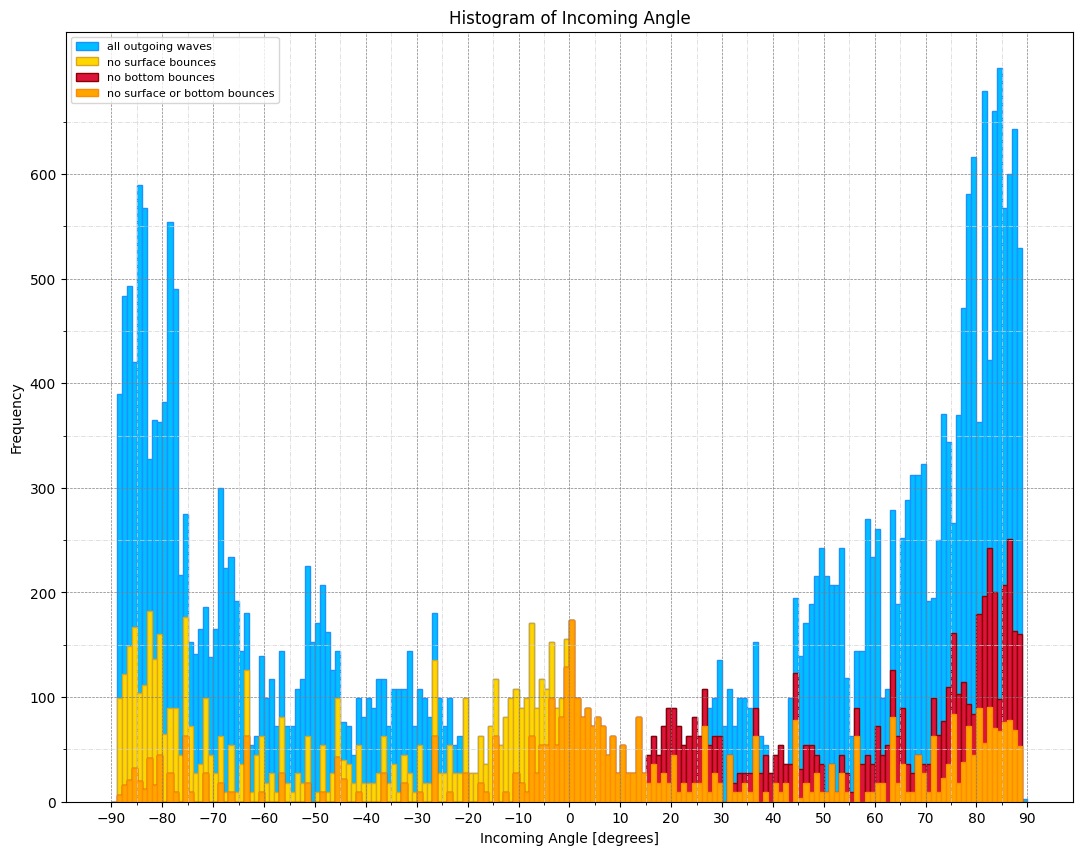

In [19]:
angle_of_arrival_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
angle_of_arrival_no_surface = angle_of_arrival_array[(surface_bounces_array == 0)]
angle_of_arrival_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0)]

# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(13, 10))
plt.hist(angle_of_arrival, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
plt.hist(angle_of_arrival_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
plt.hist(angle_of_arrival_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
plt.hist(angle_of_arrival_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label='no surface or bottom bounces')

# add labels and title
plt.xlabel('Incoming Angle [degrees]')
plt.ylabel('Frequency')
plt.title('Histogram of Incoming Angle')

# set major and minor ticks
xmajor_tick_interval = 10
xminor_tick_interval = 5
ymajor_tick_interval = 100
yminor_tick_interval = 50

plt.xticks(range(-90, 91, xmajor_tick_interval))
plt.yticks(range(0, 700, ymajor_tick_interval))
plt.xticks(range(-90, 91, xminor_tick_interval), minor=True)
plt.yticks(range(0, 700, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# add legend
plt.legend(fontsize=8)

# show plot
plt.show()

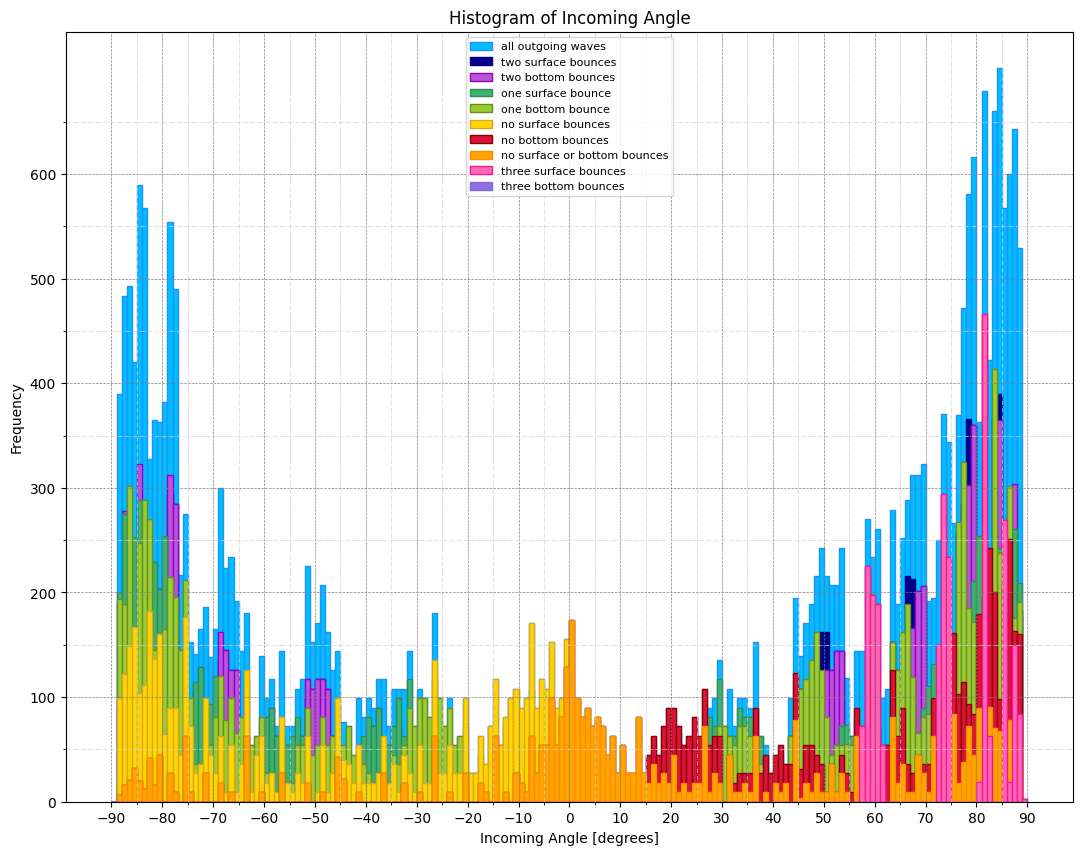

In [20]:
angle_of_arrival_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
angle_of_arrival_no_surface = angle_of_arrival_array[(surface_bounces_array == 0)]
angle_of_arrival_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0)]
angle_of_arrival_1_surface = angle_of_arrival_array[(surface_bounces_array == 1)]
angle_of_arrival_1_bottom = angle_of_arrival_array[(bottom_bounces_array == 1)]
angle_of_arrival_2_surface = angle_of_arrival_array[(surface_bounces_array == 2)]
angle_of_arrival_2_bottom = angle_of_arrival_array[(bottom_bounces_array == 2)]
angle_of_arrival_3_surface = angle_of_arrival_array[(surface_bounces_array == 3)]
angle_of_arrival_3_bottom = angle_of_arrival_array[(bottom_bounces_array == 3)]

# plot histogram of incoming angle with a binsize of 1 degree
plt.figure(figsize=(13, 10))
plt.hist(angle_of_arrival, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
plt.hist(angle_of_arrival_2_surface, bins=range(-90, 91), color='darkblue', edgecolor='navy', label='two surface bounces')
plt.hist(angle_of_arrival_2_bottom, bins=range(-90, 91), color='mediumorchid', edgecolor='darkviolet', label='two bottom bounces')
plt.hist(angle_of_arrival_1_surface, bins=range(-90, 91), color='mediumseagreen', edgecolor='seagreen', label='one surface bounce')
plt.hist(angle_of_arrival_1_bottom, bins=range(-90, 91), color='yellowgreen', edgecolor='olivedrab', label='one bottom bounce')
plt.hist(angle_of_arrival_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
plt.hist(angle_of_arrival_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
plt.hist(angle_of_arrival_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label='no surface or bottom bounces')
plt.hist(angle_of_arrival_3_surface, bins=range(-90, 91), color='hotpink', edgecolor='deeppink', label='three surface bounces')
plt.hist(angle_of_arrival_3_bottom, bins=range(-90, 91), color='mediumpurple', edgecolor='mediumslateblue', label='three bottom bounces')

# add labels and title
plt.xlabel('Incoming Angle [degrees]')
plt.ylabel('Frequency')
plt.title('Histogram of Incoming Angle')

# set major and minor ticks
xmajor_tick_interval = 10
xminor_tick_interval = 5
ymajor_tick_interval = 100
yminor_tick_interval = 50

plt.xticks(range(-90, 91, xmajor_tick_interval))
plt.yticks(range(0, 700, ymajor_tick_interval))
plt.xticks(range(-90, 91, xminor_tick_interval), minor=True)
plt.yticks(range(0, 700, yminor_tick_interval), minor=True)

# add grid
plt.grid(which='major', linestyle='--', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# add legend
plt.legend(fontsize=8)

# show plot
plt.show()

In [21]:
# filter out incoming angles for hydrophone at 400 meters depth
incoming_angles_400m = angle_of_arrival_array[hydrophone_depth_array == 400]
incoming_angles_500m = angle_of_arrival_array[hydrophone_depth_array == 500]
incoming_angles_600m = angle_of_arrival_array[hydrophone_depth_array == 600]
incoming_angles_700m = angle_of_arrival_array[hydrophone_depth_array == 700]
incoming_angles_800m = angle_of_arrival_array[hydrophone_depth_array == 800]
incoming_angles_900m = angle_of_arrival_array[hydrophone_depth_array == 900]
incoming_angles_1000m = angle_of_arrival_array[hydrophone_depth_array == 1000]
incoming_angles_1100m = angle_of_arrival_array[hydrophone_depth_array == 1100]
incoming_angles_1200m = angle_of_arrival_array[hydrophone_depth_array == 1200]
incoming_angles_1300m = angle_of_arrival_array[hydrophone_depth_array == 1300]
incoming_angles_1400m = angle_of_arrival_array[hydrophone_depth_array == 1400]

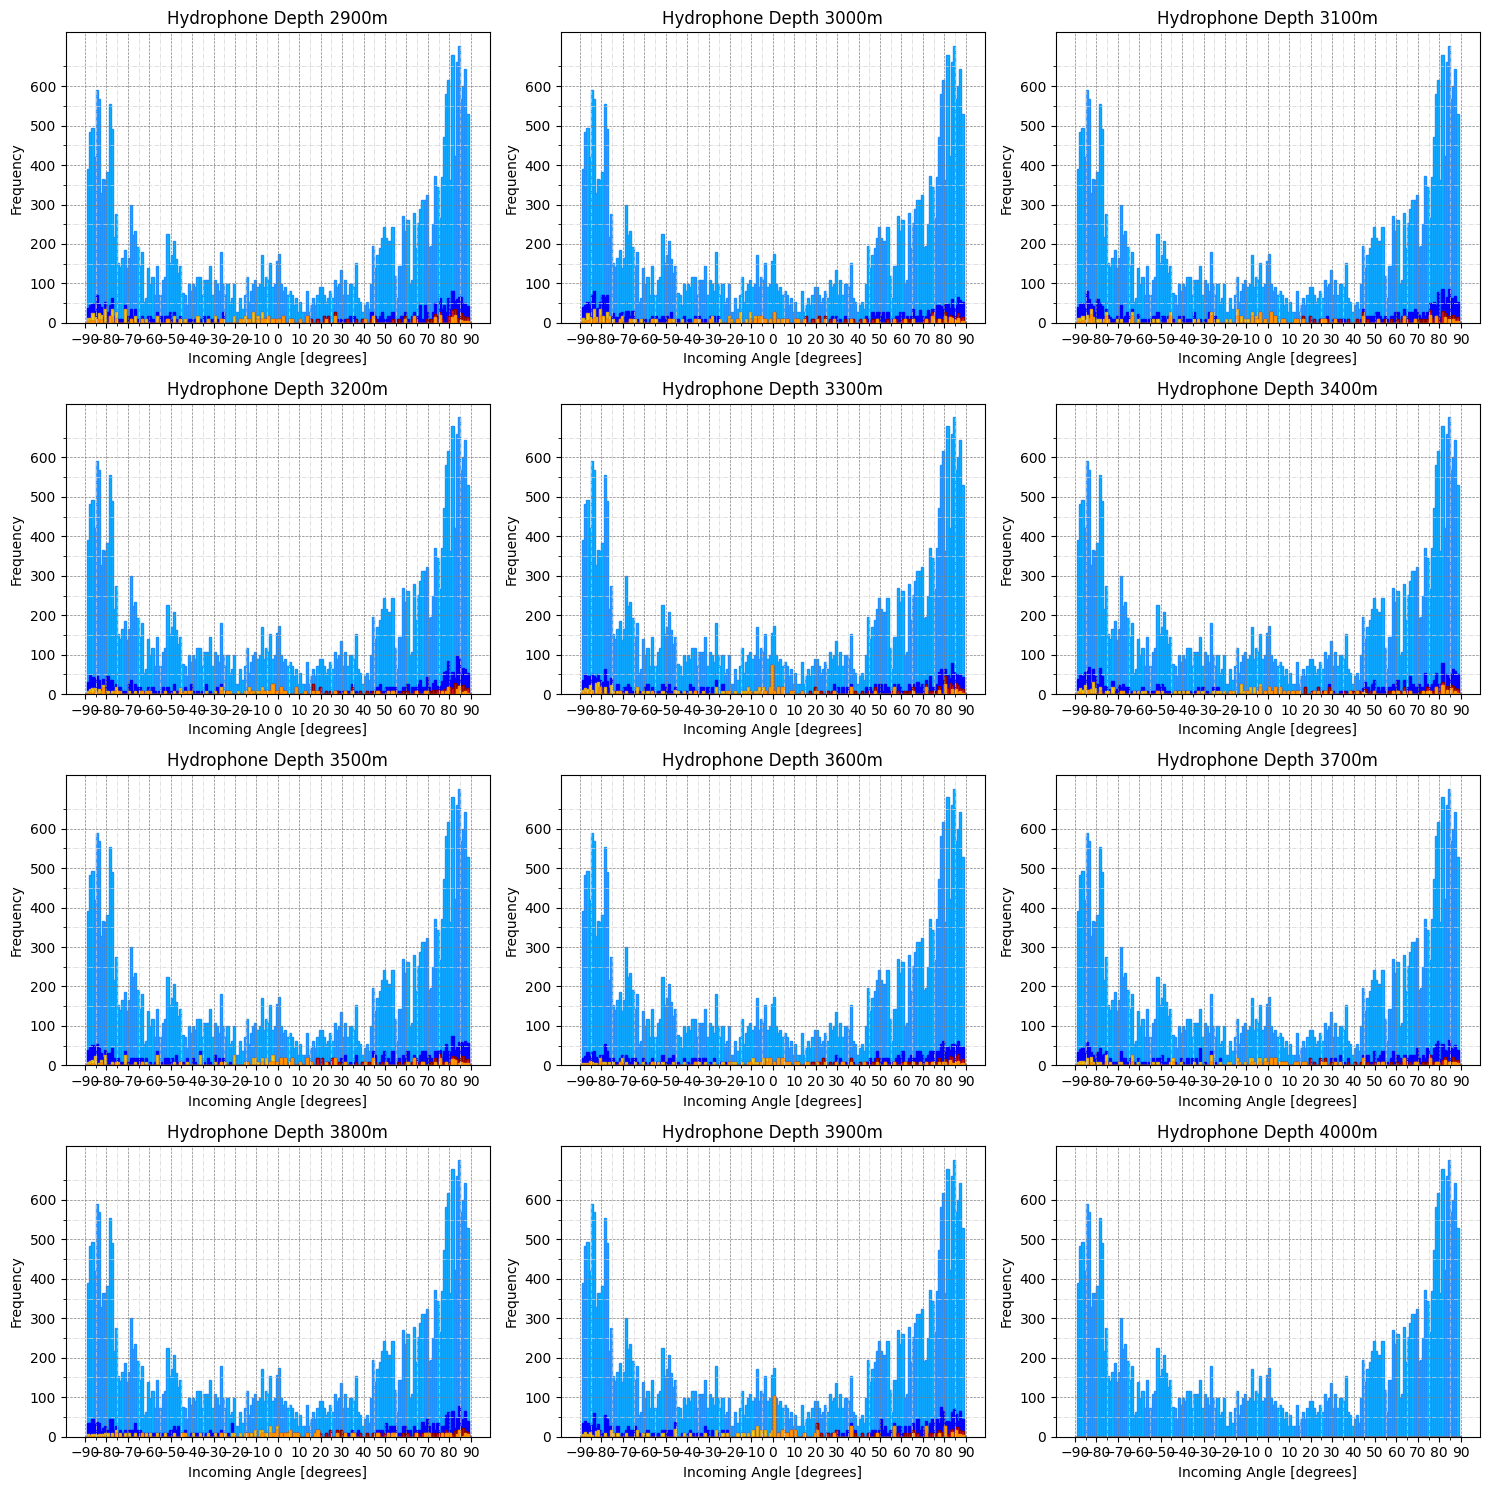

In [22]:
# define the depths
depths = [2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000]

# create a 3x4 panelled plot
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# iterate over each depth and corresponding subplot
for idx, depth in enumerate(depths):
    # filter out incoming angles for the current depth
    incoming_angles = angle_of_arrival_array[hydrophone_depth_array == depth]
    incoming_angles_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_depth_array == depth)]
    incoming_angles_no_surface = angle_of_arrival_array[(surface_bounces_array == 0) & (hydrophone_depth_array == depth)]
    incoming_angles_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0) & (hydrophone_depth_array == depth)]
    
    # calculate the row and column index for the subplot
    row_idx = idx // 3
    col_idx = idx % 3
    
    # plot histogram of incoming angle with a binsize of 1 degree
    axes[row_idx, col_idx].hist(angle_of_arrival, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    axes[row_idx, col_idx].hist(incoming_angles, bins=range(-90, 91), color='blue', edgecolor='blue', label=f'10 * Depth {depth}m')
    axes[row_idx, col_idx].hist(incoming_angles_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
    axes[row_idx, col_idx].hist(incoming_angles_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(incoming_angles_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label=f'Depth {depth}m')    
    
    # add labels and title
    axes[row_idx, col_idx].set_xlabel('Incoming Angle [degrees]')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Hydrophone Depth {depth}m')
    
    # set major and minor ticks
    xmajor_tick_interval = 10
    xminor_tick_interval = 5
    ymajor_tick_interval = 100
    yminor_tick_interval = 50
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 700, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 700, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# adjust layout
plt.tight_layout()

# show plot
plt.show()

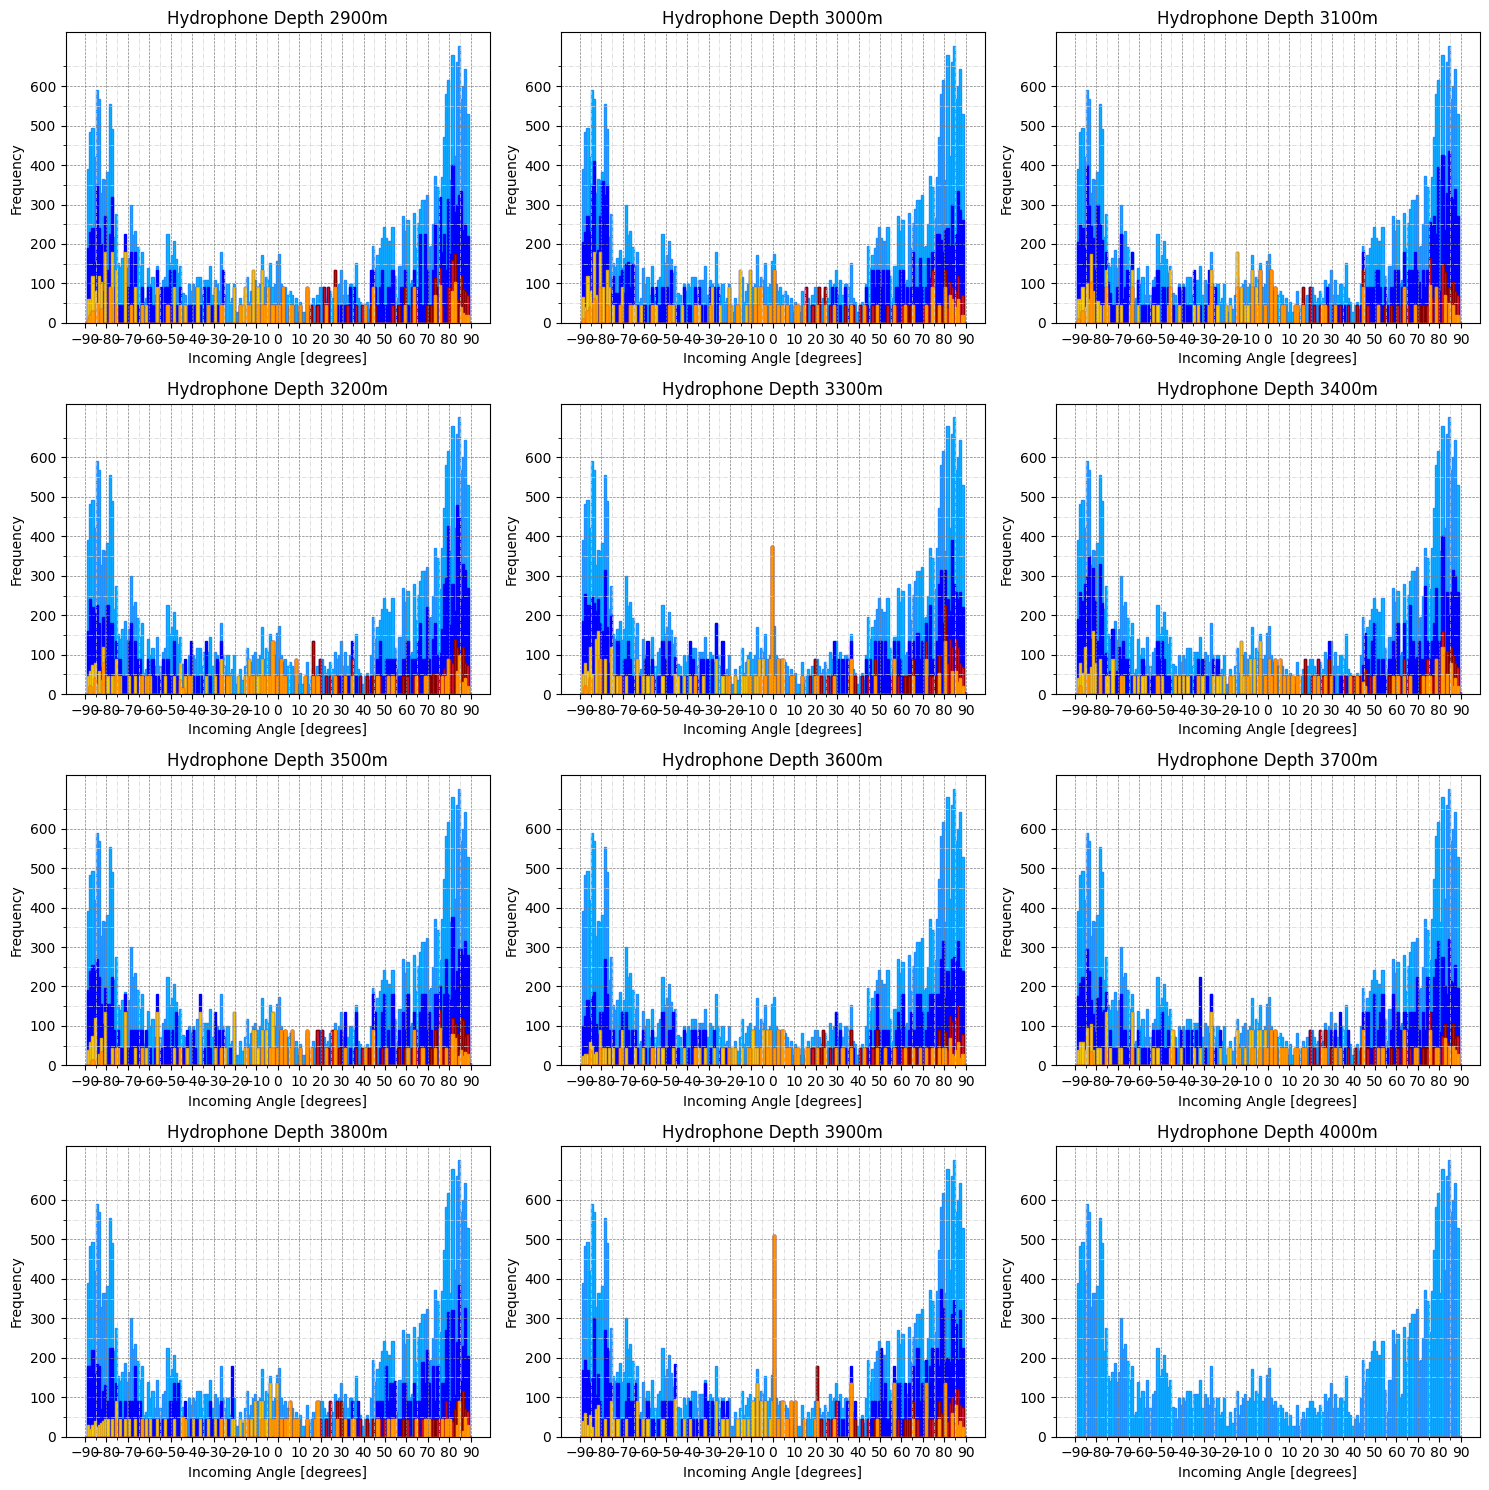

In [23]:
# define the depths
depths = [2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000]

# create a 3x4 panelled plot
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# iterate over each depth and corresponding subplot
for idx, depth in enumerate(depths):
    # filter out incoming angles for the current depth
    incoming_angles = angle_of_arrival_array[hydrophone_depth_array == depth]
    incoming_angles_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_depth_array == depth)]
    incoming_angles_no_surface = angle_of_arrival_array[(surface_bounces_array == 0) & (hydrophone_depth_array == depth)]
    incoming_angles_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0) & (hydrophone_depth_array == depth)]
    
    # calculate the row and column index for the subplot
    row_idx = idx // 3
    col_idx = idx % 3
    
    # plot histogram of incoming angle with a binsize of 1 degree
    axes[row_idx, col_idx].hist(angle_of_arrival, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    axes[row_idx, col_idx].hist(incoming_angles, bins=range(-90, 91), color='blue', edgecolor='blue', label=f'10 * Depth {depth}m', weights=np.ones_like(incoming_angles) * 5)
    axes[row_idx, col_idx].hist(incoming_angles_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces', weights=np.ones_like(incoming_angles_no_surface) * 5)
    axes[row_idx, col_idx].hist(incoming_angles_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces', weights=np.ones_like(incoming_angles_no_bottom) * 5)
    axes[row_idx, col_idx].hist(incoming_angles_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label=f'Depth {depth}m', weights=np.ones_like(incoming_angles_clean) * 5)    
    
    # add labels and title
    axes[row_idx, col_idx].set_xlabel('Incoming Angle [degrees]')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Hydrophone Depth {depth}m')
    
    # set major and minor ticks
    xmajor_tick_interval = 10
    xminor_tick_interval = 5
    ymajor_tick_interval = 100
    yminor_tick_interval = 50
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 700, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 700, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# adjust layout
plt.tight_layout()

# show plot
plt.show()

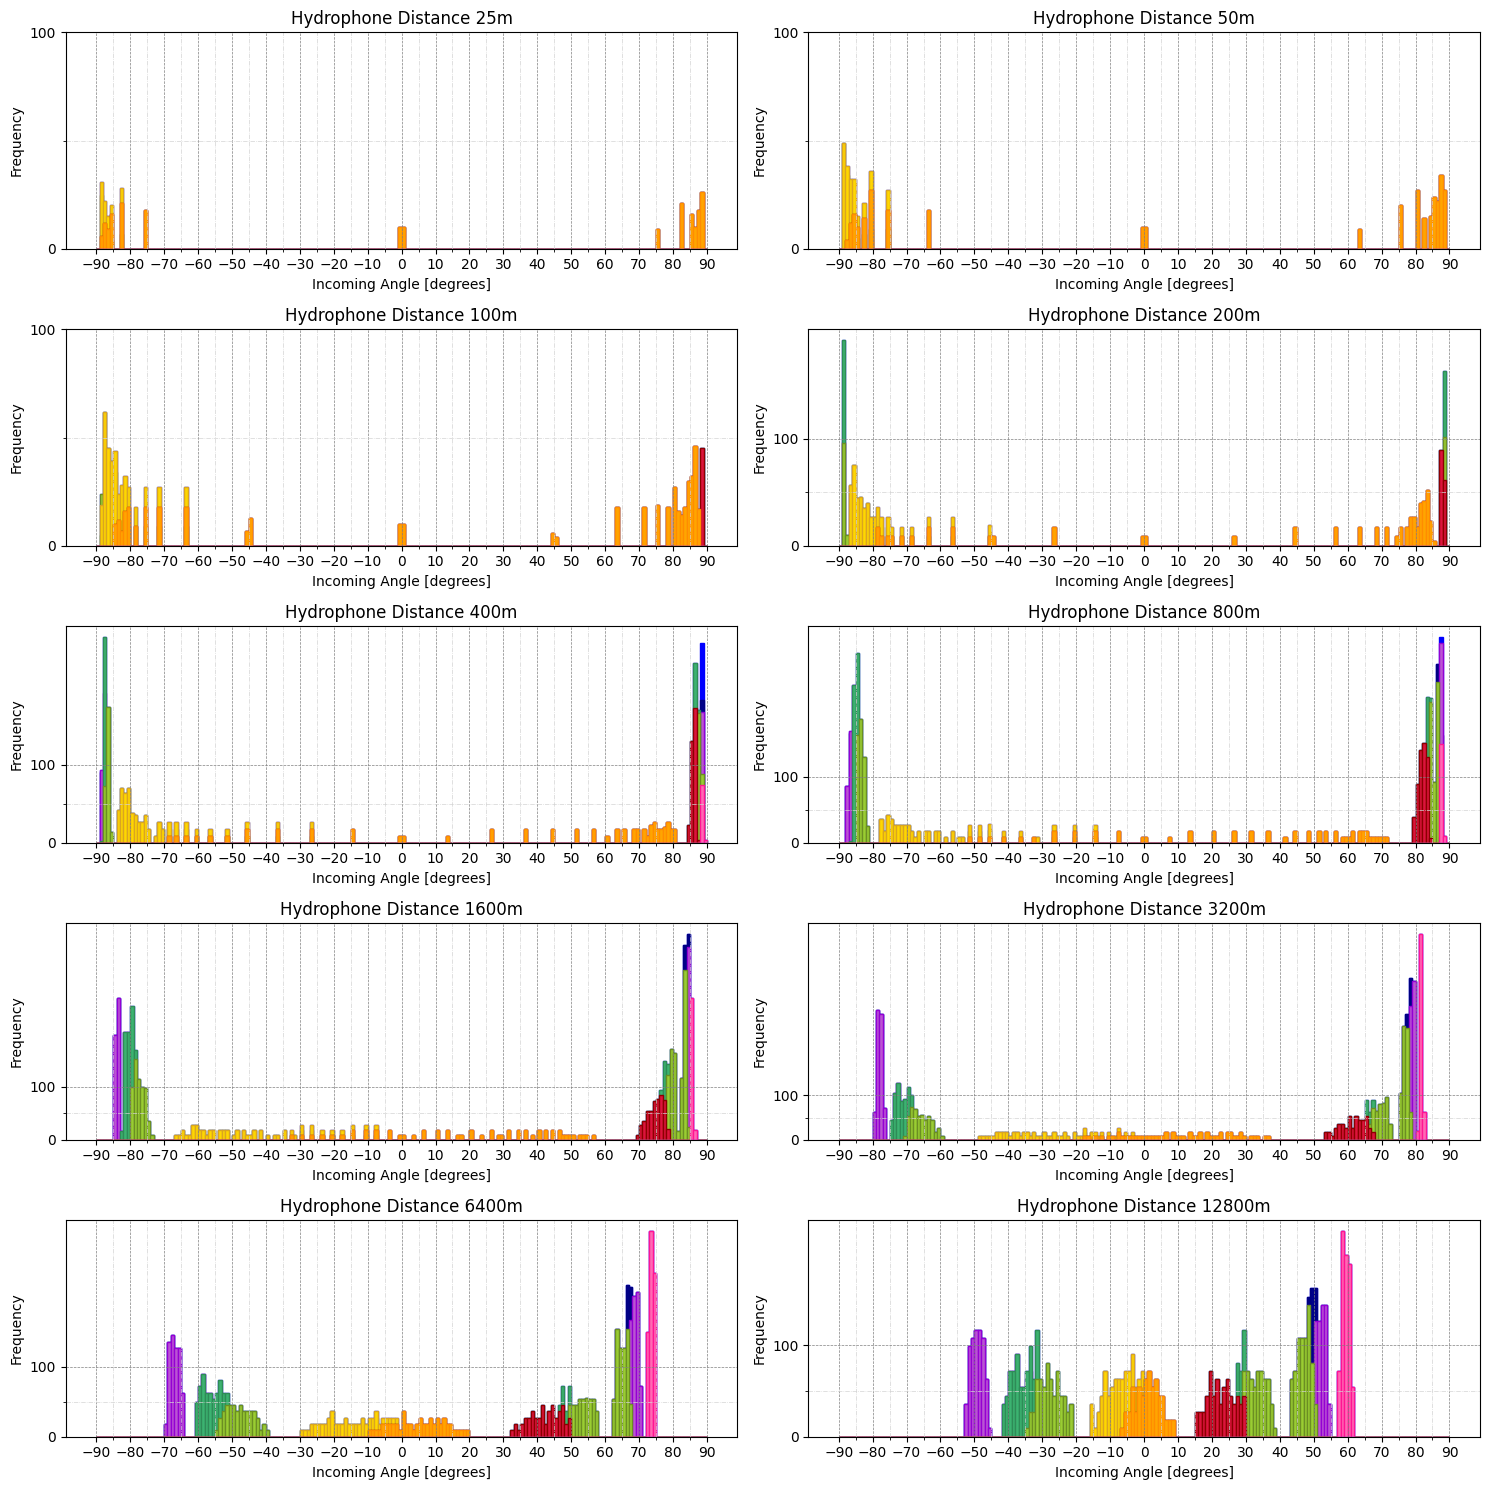

In [24]:
# define the depths
distances = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]

# create a 3x4 panelled plot
fig, axes = plt.subplots(5, 2, figsize=(15, 15))

# iterate over each depth and corresponding subplot
for idx, distance in enumerate(distances):
    # filter out incoming angles for the current depth
    incoming_angles = angle_of_arrival_array[hydrophone_distance_array == distance]
    incoming_angles_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array == distance)]
    incoming_angles_no_surface = angle_of_arrival_array[(surface_bounces_array == 0) & (hydrophone_distance_array == distance)]
    incoming_angles_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0) & (hydrophone_distance_array == distance)]
    incoming_angles_1_surface = angle_of_arrival_array[(surface_bounces_array == 1) & (hydrophone_distance_array == distance)]
    incoming_angles_1_bottom = angle_of_arrival_array[(bottom_bounces_array == 1) & (hydrophone_distance_array == distance)]
    incoming_angles_2_surface = angle_of_arrival_array[(surface_bounces_array == 2) & (hydrophone_distance_array == distance)]
    incoming_angles_2_bottom = angle_of_arrival_array[(bottom_bounces_array == 2) & (hydrophone_distance_array == distance)]
    incoming_angles_3_surface = angle_of_arrival_array[(surface_bounces_array == 3) & (hydrophone_distance_array == distance)]
    incoming_angles_3_bottom = angle_of_arrival_array[(bottom_bounces_array == 3) & (hydrophone_distance_array == distance)]
    
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2
    
    # plot histogram of incoming angle with a binsize of 1 degree
    # axes[row_idx, col_idx].hist(angle_of_arrival, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    axes[row_idx, col_idx].hist(incoming_angles, bins=range(-90, 91), color='blue', edgecolor='blue', label=f'10 * Distance {distance}m')
    axes[row_idx, col_idx].hist(incoming_angles_2_surface, bins=range(-90, 91), color='darkblue', edgecolor='navy', label='two surface bounces')
    axes[row_idx, col_idx].hist(incoming_angles_2_bottom, bins=range(-90, 91), color='mediumorchid', edgecolor='darkviolet', label='two bottom bounces')
    axes[row_idx, col_idx].hist(incoming_angles_1_surface, bins=range(-90, 91), color='mediumseagreen', edgecolor='seagreen', label='one surface bounce')
    axes[row_idx, col_idx].hist(incoming_angles_1_bottom, bins=range(-90, 91), color='yellowgreen', edgecolor='olivedrab', label='one bottom bounce')
    axes[row_idx, col_idx].hist(incoming_angles_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
    axes[row_idx, col_idx].hist(incoming_angles_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(incoming_angles_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label=f'Distance {distance}m')         
    axes[row_idx, col_idx].hist(incoming_angles_3_surface, bins=range(-90, 91), color='hotpink', edgecolor='deeppink', label='three surface bounces')
    axes[row_idx, col_idx].hist(incoming_angles_3_bottom, bins=range(-90, 91), color='mediumpurple', edgecolor='mediumslateblue', label='three bottom bounces')
    
    # add labels and title
    axes[row_idx, col_idx].set_xlabel('Incoming Angle [degrees]')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Hydrophone Distance {distance}m')
    
    # set major and minor ticks
    xmajor_tick_interval = 10
    xminor_tick_interval = 5
    ymajor_tick_interval = 100
    yminor_tick_interval = 50
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 150, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 150, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# adjust layout
plt.tight_layout()

# show plot
plt.show()

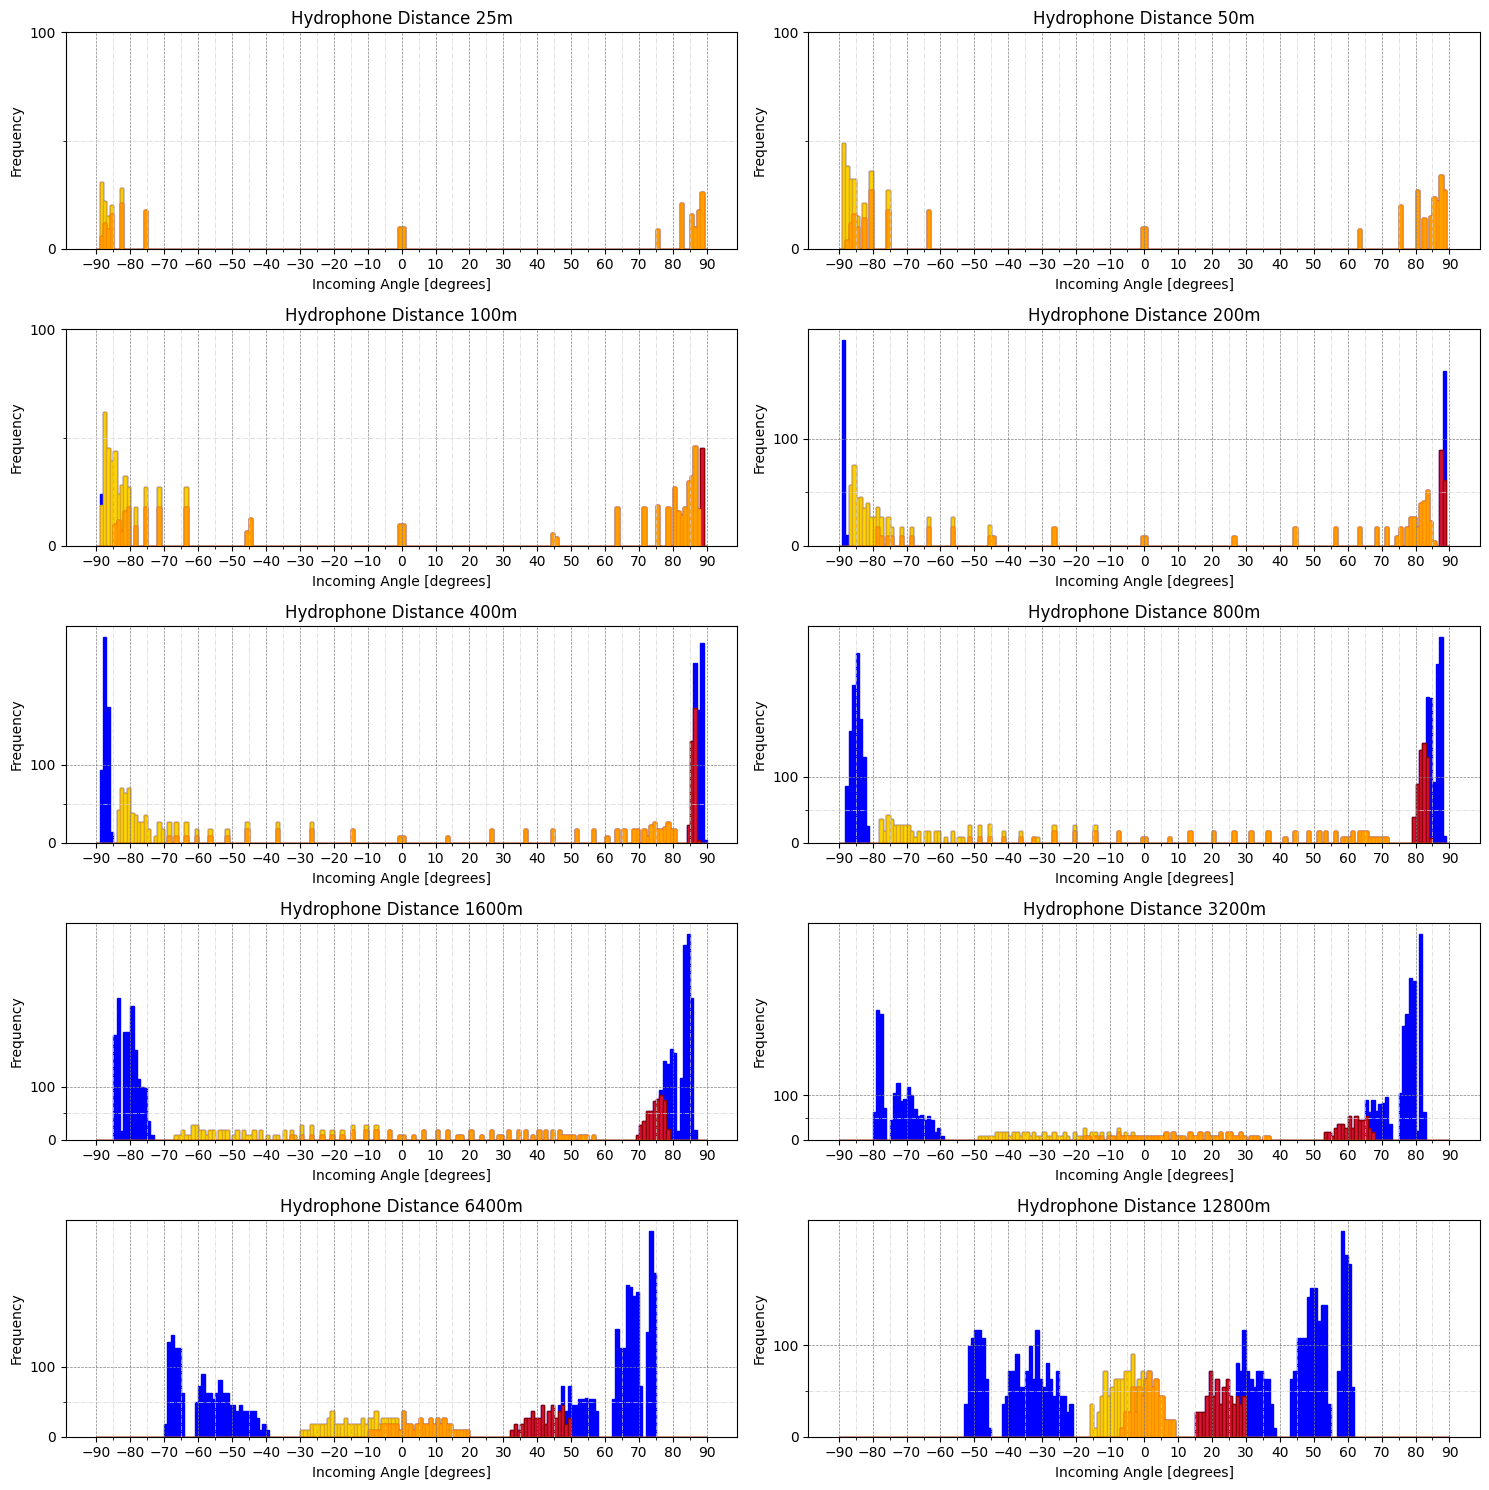

In [25]:
# define the depths
distances = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]

# create a 3x4 panelled plot
fig, axes = plt.subplots(5, 2, figsize=(15, 15))

# iterate over each depth and corresponding subplot
for idx, distance in enumerate(distances):
    # filter out incoming angles for the current depth
    incoming_angles = angle_of_arrival_array[hydrophone_distance_array == distance]
    incoming_angles_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0) & (hydrophone_distance_array == distance)]
    incoming_angles_no_surface = angle_of_arrival_array[(surface_bounces_array == 0) & (hydrophone_distance_array == distance)]
    incoming_angles_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0) & (hydrophone_distance_array == distance)]
    
    # calculate the row and column index for the subplot
    row_idx = idx // 2
    col_idx = idx % 2
    
    # plot histogram of incoming angle with a binsize of 1 degree
    # axes[row_idx, col_idx].hist(angle_of_arrival, bins=range(-90, 91), color='deepskyblue', edgecolor='dodgerblue', label='All Data')
    axes[row_idx, col_idx].hist(incoming_angles, bins=range(-90, 91), color='blue', edgecolor='blue', label=f'10 * Distance {distance}m')
    axes[row_idx, col_idx].hist(incoming_angles_no_surface, bins=range(-90, 91), color='gold', edgecolor='goldenrod', label='no surface bounces')
    axes[row_idx, col_idx].hist(incoming_angles_no_bottom, bins=range(-90, 91), color='crimson', edgecolor='darkred', label='no bottom bounces')
    axes[row_idx, col_idx].hist(incoming_angles_clean, bins=range(-90, 91), color='orange', edgecolor='darkorange', label=f'Distance {distance}m')         
    
    # add labels and title
    axes[row_idx, col_idx].set_xlabel('Incoming Angle [degrees]')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Hydrophone Distance {distance}m')
    
    # set major and minor ticks
    xmajor_tick_interval = 10
    xminor_tick_interval = 5
    ymajor_tick_interval = 100
    yminor_tick_interval = 50
    
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xmajor_tick_interval))
    axes[row_idx, col_idx].set_yticks(range(0, 150, ymajor_tick_interval))
    axes[row_idx, col_idx].set_xticks(range(-90, 91, xminor_tick_interval), minor=True)
    axes[row_idx, col_idx].set_yticks(range(0, 150, yminor_tick_interval), minor=True)
    
    # add grid
    axes[row_idx, col_idx].grid(which='major', linestyle='--', linewidth='0.5', color='gray')
    axes[row_idx, col_idx].grid(which='minor', linestyle='-.', linewidth='0.5', color='lightgray')

# adjust layout
plt.tight_layout()

# show plot
plt.show()

In [26]:
# redefine the parameters for consistency in the code
pancake_angle_clean = pancake_angle_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
pancake_angle_no_surface = pancake_angle_array[(surface_bounces_array == 0)]
pancake_angle_no_bottom = pancake_angle_array[(bottom_bounces_array == 0)]
pancake_angle_1_surface = pancake_angle_array[(surface_bounces_array == 1)]
pancake_angle_1_bottom = pancake_angle_array[(bottom_bounces_array == 1)]
pancake_angle_2_surface = pancake_angle_array[(surface_bounces_array == 2)]
pancake_angle_2_bottom = pancake_angle_array[(bottom_bounces_array == 2)]
pancake_angle_3_surface = pancake_angle_array[(surface_bounces_array == 3)]
pancake_angle_3_bottom = pancake_angle_array[(bottom_bounces_array == 3)]

angle_of_arrival_clean = angle_of_arrival_array[(surface_bounces_array == 0) & (bottom_bounces_array == 0)]
angle_of_arrival_no_surface = angle_of_arrival_array[(surface_bounces_array == 0)]
angle_of_arrival_no_bottom = angle_of_arrival_array[(bottom_bounces_array == 0)]
angle_of_arrival_1_surface = angle_of_arrival_array[(surface_bounces_array == 1)]
angle_of_arrival_1_bottom = angle_of_arrival_array[(bottom_bounces_array == 1)]
angle_of_arrival_2_surface = angle_of_arrival_array[(surface_bounces_array == 2)]
angle_of_arrival_2_bottom = angle_of_arrival_array[(bottom_bounces_array == 2)]
angle_of_arrival_3_surface = angle_of_arrival_array[(surface_bounces_array == 3)]
angle_of_arrival_3_bottom = angle_of_arrival_array[(bottom_bounces_array == 3)]

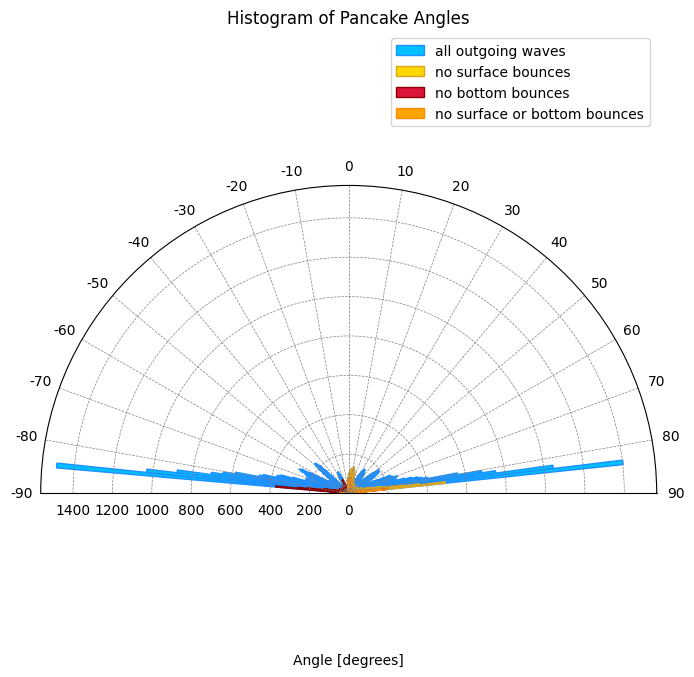

In [27]:
# sample array of angles in degrees
pancake_angles_deg = pancake_angle
pancake_angles_clean_deg = pancake_angle_clean
pancake_angles_no_surface_deg = pancake_angle_no_surface
pancake_angles_no_bottom_deg = pancake_angle_no_bottom

# convert angles to radians
pancake_angles_rad = np.deg2rad(pancake_angles_deg)
pancake_angles_clean_rad = np.deg2rad(pancake_angles_clean_deg)
pancake_angles_no_surface_rad = np.deg2rad(pancake_angles_no_surface_deg)
pancake_angles_no_bottom_rad = np.deg2rad(pancake_angles_no_bottom_deg)

# create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# plot the histogram
ax.hist(pancake_angles_rad, bins=180, color='deepskyblue', edgecolor='dodgerblue', label='all outgoing waves')
ax.hist(pancake_angles_no_surface_rad, bins=180, color='gold', edgecolor='goldenrod', label='no surface bounces')
ax.hist(pancake_angles_no_bottom_rad, bins=180, color='crimson', edgecolor='darkred', label='no bottom bounces')
ax.hist(pancake_angles_clean_rad, bins=180, color='orange', edgecolor='darkorange', label='no surface or bottom bounces')

# set the direction of the theta axis (clockwise or counterclockwise)
ax.set_theta_direction(-1)

# set the theta zero location (0 degrees at the top)
ax.set_theta_zero_location('N')

# set the theta ticks and labels
ax.set_xticks(np.linspace(-0.5*np.pi, 0.5*np.pi, num=19, endpoint=True))
ax.set_xticklabels(['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90'])
ax.set_xlim(-0.5*np.pi, 0.5*np.pi)

# set the grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# add labels and title
plt.xlabel('Angle [degrees]')
plt.title('Histogram of Pancake Angles')

# add a legend
plt.legend()

# show plot
plt.show()

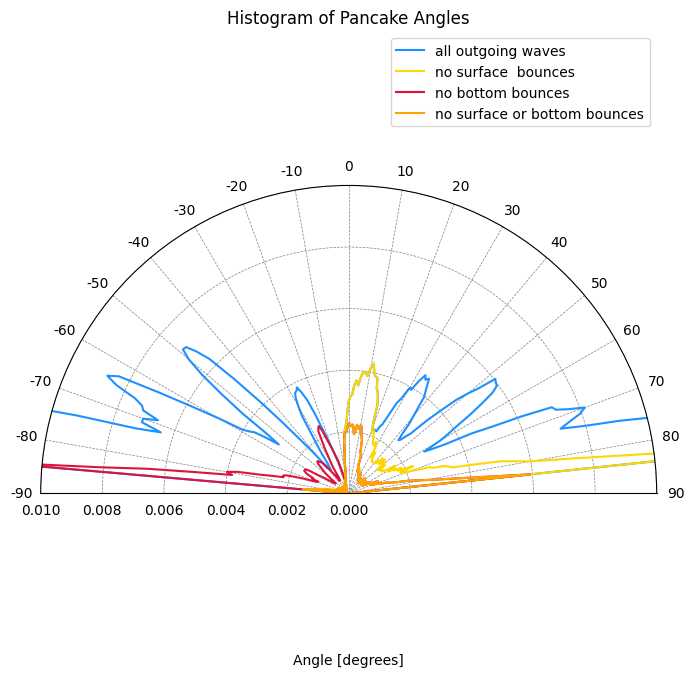

In [28]:
# define a histogram as to count the number of events
counts, bins = np.histogram(pancake_angles_deg, bins=range(-90, 91, 1))
counts_clean, bins_clean = np.histogram(pancake_angles_clean_deg, bins=range(-90, 91, 1))
counts_no_surface, bins_no_surface = np.histogram(pancake_angles_no_surface_deg, bins=range(-90, 91, 1))
counts_no_bottom, bins_no_bottom = np.histogram(pancake_angles_no_bottom_deg, bins=range(-90, 91, 1))

# count the total amount of counts
total = sum(counts)
weighted_counts = [i / total for i in counts]
weighted_counts_clean = [i / total for i in counts_clean]
weighted_counts_no_surface = [i / total for i in counts_no_surface]
weighted_counts_no_bottom = [i / total for i in counts_no_bottom]

# convert angles to radians
bins_rad = np.deg2rad(bins[:-1])
bins_clean_rad = np.deg2rad(bins_clean[:-1])
bins_no_surface_rad = np.deg2rad(bins_no_surface[:-1])
bins_no_bottom_rad = np.deg2rad(bins_no_bottom[:-1])

# create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# plot the histogram
ax.plot(bins_rad, weighted_counts, color='dodgerblue', label='all outgoing waves')
ax.plot(bins_no_surface_rad, weighted_counts_no_surface, color='gold', label='no surface  bounces')
ax.plot(bins_no_bottom_rad, weighted_counts_no_bottom, color='crimson', label='no bottom bounces')
ax.plot(bins_clean_rad, weighted_counts_clean, color='orange', label='no surface or bottom bounces')

# set the direction of the theta axis (clockwise or counterclockwise)
ax.set_theta_direction(-1)

# set the theta zero location (0 degrees at the top)
ax.set_theta_zero_location('N')

# set the theta ticks and labels
ax.set_xticks(np.linspace(-0.5*np.pi, 0.5*np.pi, num=19, endpoint=True))
ax.set_xticklabels(['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90'])
ax.set_xlim(-0.5*np.pi, 0.5*np.pi)

# set the grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# add labels and title
plt.xlabel('Angle [degrees]')
plt.title('Histogram of Pancake Angles')
plt.ylim(0, 0.01)

# add a legend
plt.legend()

# show plot
plt.show()

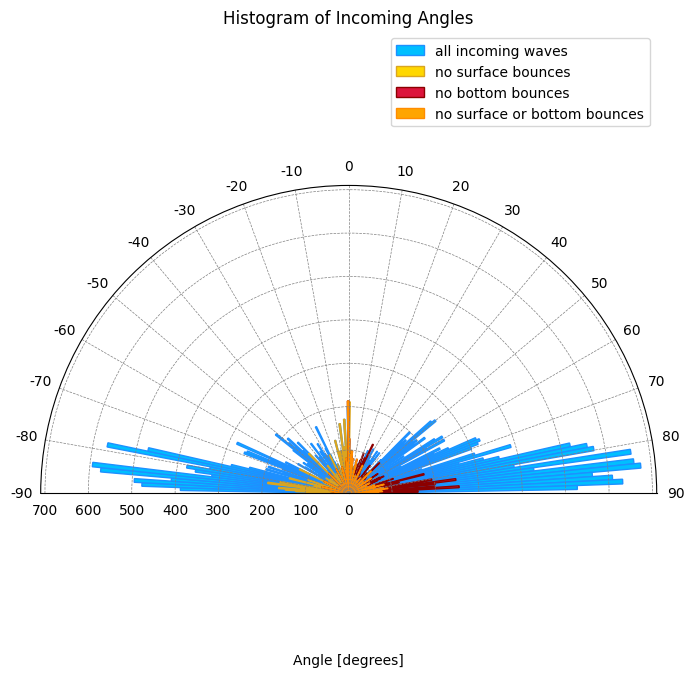

In [29]:
# sample array of angles in degrees
arrival_angles_deg = angle_of_arrival_array
arrival_angles_clean_deg = angle_of_arrival_clean
arrival_angles_no_surface_deg = angle_of_arrival_no_surface
arrival_angles_no_bottom_deg = angle_of_arrival_no_bottom

# convert angles to radians
arrival_angles_rad = np.deg2rad(arrival_angles_deg)
arrival_angles_clean_rad = np.deg2rad(arrival_angles_clean_deg)
arrival_angles_no_surface_rad = np.deg2rad(arrival_angles_no_surface_deg)
arrival_angles_no_bottom_rad = np.deg2rad(arrival_angles_no_bottom_deg)

# create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# plot the histogram
ax.hist(arrival_angles_rad, bins=180, color='deepskyblue', edgecolor='dodgerblue', label='all incoming waves')
ax.hist(arrival_angles_no_surface_rad, bins=180, color='gold', edgecolor='goldenrod', label='no surface bounces')
ax.hist(arrival_angles_no_bottom_rad, bins=180, color='crimson', edgecolor='darkred', label='no bottom bounces')
ax.hist(arrival_angles_clean_rad, bins=180, color='orange', edgecolor='darkorange', label='no surface or bottom bounces')

# set the direction of the theta axis (clockwise or counterclockwise)
ax.set_theta_direction(-1)

# set the theta zero location (0 degrees at the top)
ax.set_theta_zero_location('N')

# set the theta ticks and labels
ax.set_xticks(np.linspace(-0.5*np.pi, 0.5*np.pi, num=19, endpoint=True))
ax.set_xticklabels(['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90'])
ax.set_xlim(-0.5*np.pi, 0.5*np.pi)

# set the grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# add labels and title
plt.xlabel('Angle [degrees]')
plt.title('Histogram of Incoming Angles')

# add a legend
plt.legend()

# show plot
plt.show()

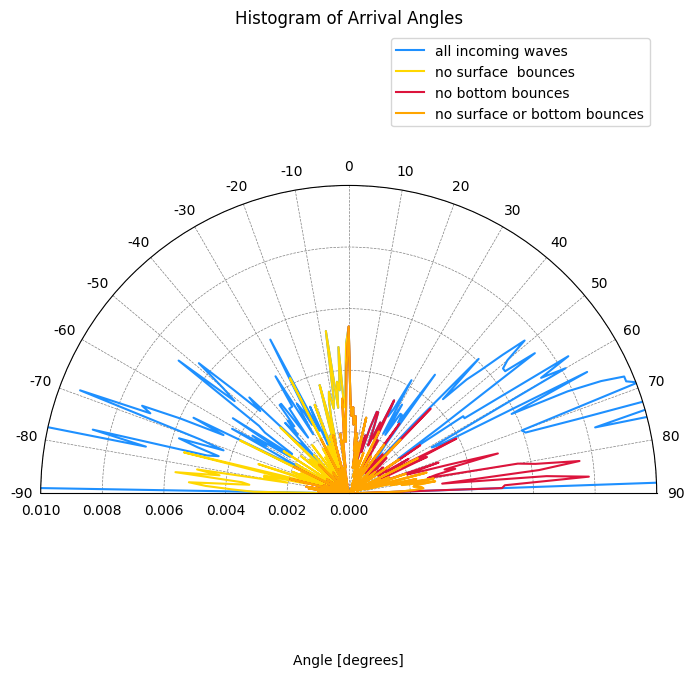

In [30]:
# define a histogram as to count the number of events
acounts, abins = np.histogram(arrival_angles_deg, bins=range(-90, 91, 1))
acounts_clean, abins_clean = np.histogram(arrival_angles_clean_deg, bins=range(-90, 91, 1))
acounts_no_surface, abins_no_surface = np.histogram(arrival_angles_no_surface_deg, bins=range(-90, 91, 1))
acounts_no_bottom, abins_no_bottom = np.histogram(arrival_angles_no_bottom_deg, bins=range(-90, 91, 1))

# count the total amount of counts
atotal = sum(acounts)
aweighted_counts = [i / atotal for i in acounts]
aweighted_counts_clean = [i / atotal for i in acounts_clean]
aweighted_counts_no_surface = [i / atotal for i in acounts_no_surface]
aweighted_counts_no_bottom = [i / atotal for i in acounts_no_bottom]

# convert angles to radians
abins_rad = np.deg2rad(abins[:-1])
abins_clean_rad = np.deg2rad(abins_clean[:-1])
abins_no_surface_rad = np.deg2rad(abins_no_surface[:-1])
abins_no_bottom_rad = np.deg2rad(abins_no_bottom[:-1])

# create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# plot the histogram
ax.plot(abins_rad, aweighted_counts, color='dodgerblue', label='all incoming waves')
ax.plot(abins_no_surface_rad, aweighted_counts_no_surface, color='gold', label='no surface  bounces')
ax.plot(abins_no_bottom_rad, aweighted_counts_no_bottom, color='crimson', label='no bottom bounces')
ax.plot(abins_clean_rad, aweighted_counts_clean, color='orange', label='no surface or bottom bounces')

# set the direction of the theta axis (clockwise or counterclockwise)
ax.set_theta_direction(-1)

# set the theta zero location (0 degrees at the top)
ax.set_theta_zero_location('N')

# set the theta ticks and labels
ax.set_xticks(np.linspace(-0.5*np.pi, 0.5*np.pi, num=19, endpoint=True))
ax.set_xticklabels(['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90'])
ax.set_xlim(-0.5*np.pi, 0.5*np.pi)

# set the grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# add labels and title
plt.xlabel('Angle [degrees]')
plt.title('Histogram of Arrival Angles')
plt.ylim(0, 0.01)

# add a legend
plt.legend()

# show plot
plt.show()

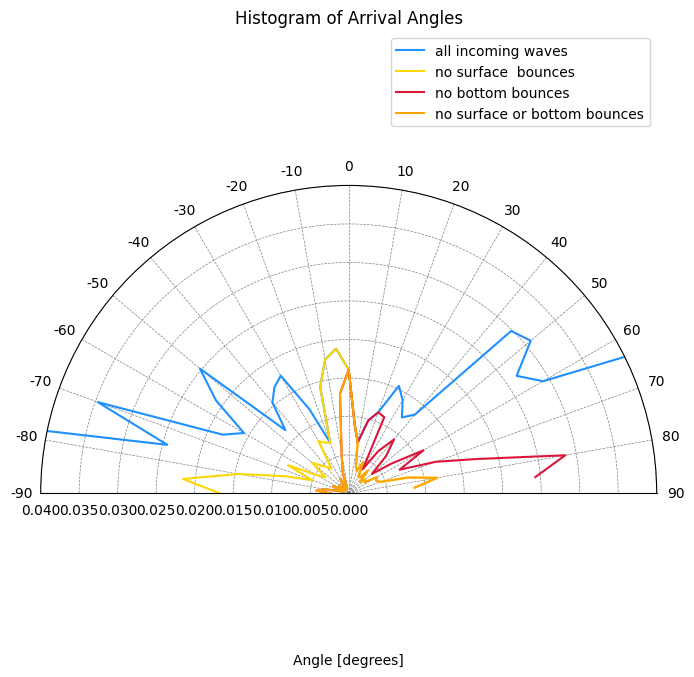

In [31]:
# define a histogram as to count the number of events
acounts, abins = np.histogram(arrival_angles_deg, bins=range(-90, 91, 5))
acounts_clean, abins_clean = np.histogram(arrival_angles_clean_deg, bins=range(-90, 95, 5))
acounts_no_surface, abins_no_surface = np.histogram(arrival_angles_no_surface_deg, bins=range(-90, 91, 5))
acounts_no_bottom, abins_no_bottom = np.histogram(arrival_angles_no_bottom_deg, bins=range(-90, 91, 5))

# count the total amount of counts
atotal = sum(acounts)
aweighted_counts = [i / atotal for i in acounts]
aweighted_counts_clean = [i / atotal for i in acounts_clean]
aweighted_counts_no_surface = [i / atotal for i in acounts_no_surface]
aweighted_counts_no_bottom = [i / atotal for i in acounts_no_bottom]

# convert angles to radians
abins_rad = np.deg2rad(abins[:-1])
abins_clean_rad = np.deg2rad(abins_clean[:-1])
abins_no_surface_rad = np.deg2rad(abins_no_surface[:-1])
abins_no_bottom_rad = np.deg2rad(abins_no_bottom[:-1])

# create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# plot the histogram
ax.plot(abins_rad, aweighted_counts, color='dodgerblue', label='all incoming waves')
ax.plot(abins_no_surface_rad, aweighted_counts_no_surface, color='gold', label='no surface  bounces')
ax.plot(abins_no_bottom_rad, aweighted_counts_no_bottom, color='crimson', label='no bottom bounces')
ax.plot(abins_clean_rad, aweighted_counts_clean, color='orange', label='no surface or bottom bounces')

# set the direction of the theta axis (clockwise or counterclockwise)
ax.set_theta_direction(-1)

# set the theta zero location (0 degrees at the top)
ax.set_theta_zero_location('N')

# set the theta ticks and labels
ax.set_xticks(np.linspace(-0.5*np.pi, 0.5*np.pi, num=19, endpoint=True))
ax.set_xticklabels(['-90', '-80', '-70', '-60', '-50', '-40', '-30', '-20', '-10', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90'])
ax.set_xlim(-0.5*np.pi, 0.5*np.pi)

# set the grid
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# add labels and title
plt.xlabel('Angle [degrees]')
plt.title('Histogram of Arrival Angles')
plt.ylim(0, 0.04)

# add a legend
plt.legend()

# show plot
plt.show()